In [ ]:
import os
import dotenv
import unicodedata
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as pltgr
from matplotlib.ticker import FuncFormatter

In [2]:
def limpiaTexto(texto):
    if not isinstance(texto, str):
        return texto
    # Proteger la ñ y Ñ con un marcador temporal
    texto = texto.replace('ñ', '__enie__').replace('Ñ', '__ENIE__')
    # Quitar tildes
    texto = ''.join(
        c for c in unicodedata.normalize('NFD', texto)
        if unicodedata.category(c) != 'Mn'
    )
    # Restaurar la ñ y Ñ
    return texto.replace('__enie__', 'ñ').replace('__ENIE__', 'Ñ')

In [3]:
def limpiaComunas(texto):
    if not isinstance(texto, str):
        return texto
    coma_pos = texto.find(",")
    if coma_pos != -1:
        tfinal = texto[:coma_pos].lower()
        x = tfinal.find("de chile")
        if x != -1:
            tfinal = tfinal[:x].strip()
        return tfinal
    elif texto.lower().find("santiago") != -1:
        return texto.lower().replace("santiago -", "").strip()
    elif texto.lower().find("- santiago") != -1:
        return texto.lower().replace("- santiago", "").strip()
    return texto.lower()

In [4]:
# Ajustar la cantidad máxima de filas y columnas para mostrar
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas

In [5]:
dotenv.load_dotenv()
path_csv = os.getenv("CSV_CHILETRABAJOS")
path_csv2 = os.getenv("CSV_COMPUTRABAJO")
path_csv3 = os.getenv("CSV_INDEED")
cant_datos_final=0
cant_datos_iniciales=0
empleos_no_it= []
with open("trabajos_no_ti.txt", "r",encoding="utf-8") as f:
    for line in f:
        line = line.strip().lower()
        empleos_no_it.append(line)

def limpiaFilas(oferta):
    oferta = oferta.lower()
    # Comprobar si la oferta contiene alguna de las palabras clave
    for empleo in empleos_no_it:
        if empleo in oferta:
            return True
    return False
try:
    df_temp = pd.read_csv(path_csv,sep=";",encoding="utf-8")
    print("Datos de 'chiletrabajos.com' cargados.")
    cant_datos_iniciales += len(df_temp)
    # Limpia caracteres de ofertas
    # Elimna ofertas
    df = df_temp[~df_temp['Oferta'].apply(lambda oferta: limpiaFilas(str(oferta)))]
    cant_datos_final += len(df)
    display(df.head())
except Exception as e:
        print(f"error :{e}")
        
try:
    df2_temp = pd.read_csv(path_csv2,sep=",",encoding="utf-8")
    print("datos 'computrabajo.com' cargados")
    cant_datos_iniciales += len(df2_temp)
    # Elimina ofertas
    df2 = df2_temp[~df2_temp['Cargo'].apply(lambda oferta: limpiaFilas(str(oferta)))]
    cant_datos_final += len(df2)
    #df2['Cargo'] = df2['Cargo'].apply(limpiaTexto)
    display(df2.head())
except Exception as e:
        print(f"error :{e}")

try:
    df3 = pd.read_csv(path_csv3,sep=";",encoding="utf-8")
    print("datos 'indeed.com' cargados")
    cant_datos_iniciales += len(df3)
    # Elimina ofertas
    df3 = df3[~df3['oferta'].apply(lambda oferta: limpiaFilas(str(oferta)))]
    cant_datos_final += len(df3)
    display(df3.head())
except Exception as e:
        print(f"error :{e}")
        
print(f"Cantidad de datos iniciales: {cant_datos_iniciales}")
print(f"Cantidad de datos finales: {cant_datos_final}")


Datos de 'chiletrabajos.com' cargados.


,Oferta,Salario,Beneficios,Empresa,Descripcion,Ubicacion,Fecha_Publicacion,Fecha_Expiracion
0,TECNICO TELECOMUNICACIONES METRO,$950.000.-,NaN,REDCELL,Importante empresa de telecomunicaciones se en...,Santiago,2025-04-22 14:20:33,2025-07-06 (en 75 días)
1,TECNICO TELECOMUNICACIONES CONCEPCIÓN,950.000.-,-La empresa esta adscrita a la mutual de segur...,REDCELL,Importante empresa de telecomunicaciones se en...,Concepción,2025-04-22 14:18:05,2025-07-06 (en 75 días)
2,TECNICO TELECOMUNICACIONES CHILLAN,950.0000.-,-La empresa esta adscrita a la mutual de segur...,REDCELL,Importante empresa de telecomunicaciones se en...,Chillán,2025-04-22 14:19:07,2025-07-06 (en 75 días)
3,ADMINISTRADOR SAP BASIS,2500000,"-No es necesario ir a la oficina, puedes traba...",itpeople,Importante empresa requiere incorporar a su eq...,Santiago,2025-04-22 15:12:18,2025-07-06 (en 75 días)
4,INGENIERO DE DESARROLLO DE DATOS Y SISTEMAS - ...,NaN,NaN,Job Consulting,Nuestro cliente una empresa europea líder a ni...,Concepción,2025-04-21 12:06:33,2025-07-05 (en 74 días)


datos 'computrabajo.com' cargados


,Salario,Empresa,Comuna,Región,Cargo,Descripción
1,NaN,Softtek Chile,Las condes,Metropolitana,Desarrollador .Net Senior - (con portugués),Licenciatura en Tecnología de la Información o...
2,NaN,People GO,Santiago Centro,Metropolitana,KAM (experiencia sector Industrial) – Santiago,"Somos People Go, empresa al Servicio de las Pe..."
4,NaN,Genesys Ltda.,Santiago Centro,Metropolitana,"Desarrollador Back End - Java, Python o GO","Somos una empresa con 34 años en el mercado, e..."
7,900000.0,Ramcotec Ltda,Concepción,Bíobío,Técnico electronico trabajo en terreno - Dispo...,Buscamos un Técnico Electrónico altamente moti...
15,NaN,PSINet.,Huechuraba,Metropolitana,Desarrollador Fullstack - 5x2 Oficina,"Importante empresa con presencia nacional, req..."


datos 'indeed.com' cargados


,oferta,salario,empresa,descripcion,ubicacion
1,"""Practica profesional Informática""",NaN,Applicant AI,Responsabilidades del practicante:\nConfigurac...,"Santiago de Chile, Región Metropolitana"
2,"""ENCARGADO TECNOLOGIA E INFORMATICA (TI)""",NaN,Confidencial,REALIZAR BACKUP\nSUPERVISAR CONEXIONES\nCONFIG...,"Santiago de Chile, Región Metropolitana"
3,"""Soporte Informático""",NaN,NEWREST CHILE,NEWREST empresa multinacional francesa de serv...,"Puerto Montt, Los Lagos"
4,"""Técnico en soporte Informático – Remoto (Ofe...",NaN,CLÍNICA MEDICAL HOME,Clínica medical home nos encontramos en búsque...,"Santiago de Chile, Región Metropolitana"
5,"""Practicante de Programación, Ingeniería Info...",NaN,Informática Eugcom,Informática Eugcom es una destacada empresa ch...,"Providencia, Región Metropolitana"


Cantidad de datos iniciales: 8537
Cantidad de datos finales: 4026


In [7]:
# Contamos las ofertas por ubicación en cada dataframe
tabla_ciudades_ct = df['Ubicacion'].value_counts().reset_index()
tabla_ciudades_ct.columns = ['Ciudad/Comuna', 'Cantidad_Ofertas']
tabla_ciudades_ct['Ciudad/Comuna'] = tabla_ciudades_ct['Ciudad/Comuna'].apply(limpiaComunas)

tabla_ciudades_comput = df2['Comuna'].value_counts().reset_index()
tabla_ciudades_comput.columns = ['Ciudad/Comuna', 'Cantidad_Ofertas']
tabla_ciudades_comput['Ciudad/Comuna'] = tabla_ciudades_comput['Ciudad/Comuna'].apply(limpiaComunas)

tabla_ciudades_indeed = df3['ubicacion'].value_counts().reset_index()
tabla_ciudades_indeed.columns = ['Ciudad/Comuna', 'Cantidad_Ofertas']
tabla_ciudades_indeed['Ciudad/Comuna'] = tabla_ciudades_indeed['Ciudad/Comuna'].apply(limpiaComunas)
tabla_ciudades_total = pd.concat([tabla_ciudades_ct, tabla_ciudades_comput, tabla_ciudades_indeed], ignore_index=True)
# Agrupamos por ciudad y sumamos la cantidad de ofertas
tabla_ciudades_total = tabla_ciudades_total.groupby('Ciudad/Comuna', as_index=False).sum()
# Ordenamos por cantidad de ofertas de mayor a menor
tabla_ciudades_total = tabla_ciudades_total.sort_values(by='Cantidad_Ofertas', ascending=False)

# Mostramos la tabla
print("Total de ofertas por ciudad\n")
print(print(tabla_ciudades_total.to_string(index=False)))



Total de ofertas por ciudad

      Ciudad/Comuna  Cantidad_Ofertas
           santiago              1207
         las condes               440
    santiago centro               358
        providencia               223
        antofagasta               119
            iquique                66
              ñuñoa                63
         concepción                63
          quilicura                60
         huechuraba                56
           pudahuel                54
           vitacura                41
             calama                37
           rancagua                32
              renca                31
         valparaíso                30
       viña del mar                28
            copiapó                27
              maipú                26
       puerto montt                20
       lo barnechea                20
         mejillones                19
              lampa                17
       san bernardo                17
         la florida  

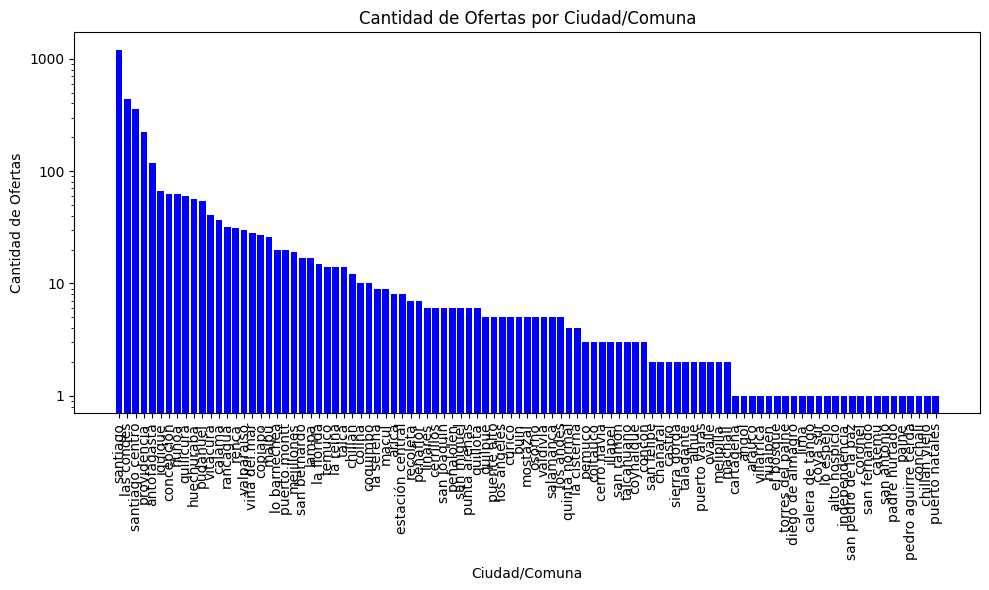

In [7]:
from matplotlib.ticker import FuncFormatter
pltgr.figure(figsize=(10, 6))
pltgr.bar(tabla_ciudades_total['Ciudad/Comuna'], tabla_ciudades_total['Cantidad_Ofertas'], color='blue')
pltgr.yscale('log')  # Escala logarítmica en el eje y

# Personalizar las etiquetas del eje y
formatter = FuncFormatter(lambda y, _: f'{int(y)}')
pltgr.gca().yaxis.set_major_formatter(formatter)
pltgr.xlabel('Ciudad/Comuna')
pltgr.ylabel('Cantidad de Ofertas')
pltgr.title('Cantidad de Ofertas por Ciudad/Comuna')
pltgr.xticks(rotation=90)
pltgr.tight_layout()
pltgr.show()

/tmp/ipykernel_2372/1667542743.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Región'] = pd.Categorical(df2['Región'], categories=orden_regiones, ordered=True)


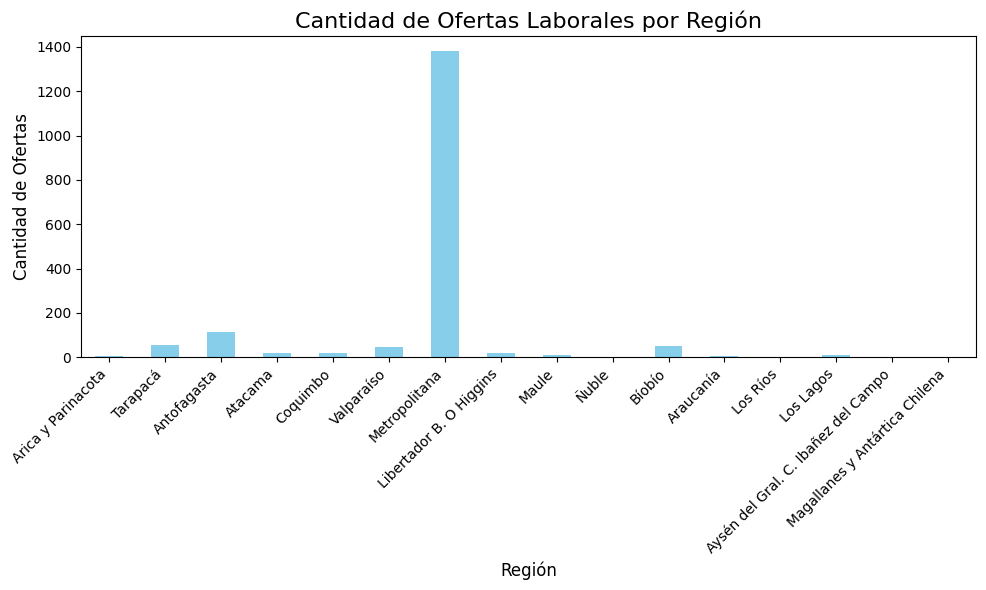

In [8]:
# Definimos el orden geográfico de las regiones de norte a sur
orden_regiones = [
    'Arica y Parinacota', 'Tarapacá', 'Antofagasta', 'Atacama', 'Coquimbo', 
    'Valparaíso', 'Metropolitana', 'Libertador B. O Higgins', 'Maule', 'Ñuble', 'Bíobío', 
    'Araucanía', 'Los Ríos', 'Los Lagos', 'Aysén del Gral. C. Ibañez del Campo', 'Magallanes y Antártica Chilena'
]

# Aseguramos que las regiones estén en el orden correcto
df2['Región'] = pd.Categorical(df2['Región'], categories=orden_regiones, ordered=True)

# Contamos la cantidad de ofertas por región
ofertas_por_region = df2['Región'].value_counts().sort_index()

# Creamos el gráfico
pltgr.figure(figsize=(10, 6))
ofertas_por_region.plot(kind='bar', color='skyblue')

# Cambiar la escala del eje y a logaritmica para mejorar la visibilidad
#pltgr.yscale('log')

# Personalizamos el gráfico
pltgr.title('Cantidad de Ofertas Laborales por Región', fontsize=16)
pltgr.xlabel('Región', fontsize=12)
pltgr.ylabel('Cantidad de Ofertas', fontsize=12)
pltgr.xticks(rotation=45, ha='right')
pltgr.tight_layout()

# Mostramos el gráfico
pltgr.show()

In [15]:
import geopandas as gpd

gdf_comunas = gpd.read_file('/home/tole/PrograCientifica/analisisOfertasLab/scripts/data/geo/13.geojson')
print(gdf_comunas.head())

# Limpiar datos: eliminar filas con salarios o comunas vacías
df2 = df2.dropna(subset=["Comuna"])


print(df2["Comuna"])

   objectid    shape_leng  dis_elec  cir_sena  cod_comuna  codregion  \
0       330  13987.326781        10         7       13129         13   
1       331  13311.641304        13         7       13130         13   
2       332  11733.486710        13         7       13131         13   
3       309  11488.695747         9         7       13108         13   
4       310  12797.595762        13         7       13109         13   

     st_area_sh    st_length_                            Region  \
0  1.424341e+07  16812.167615  Región Metropolitana de Santiago   
1  1.389538e+07  15988.816037  Región Metropolitana de Santiago   
2  9.056280e+06  14061.528858  Región Metropolitana de Santiago   
3  1.068637e+07  14088.417488  Región Metropolitana de Santiago   
4  1.454185e+07  15442.412755  Región Metropolitana de Santiago   

          Comuna Provincia                                           geometry  
0    San Joaquín  Santiago  POLYGON ((-70.62342 -33.47338, -70.62292 -33.4...  
1   

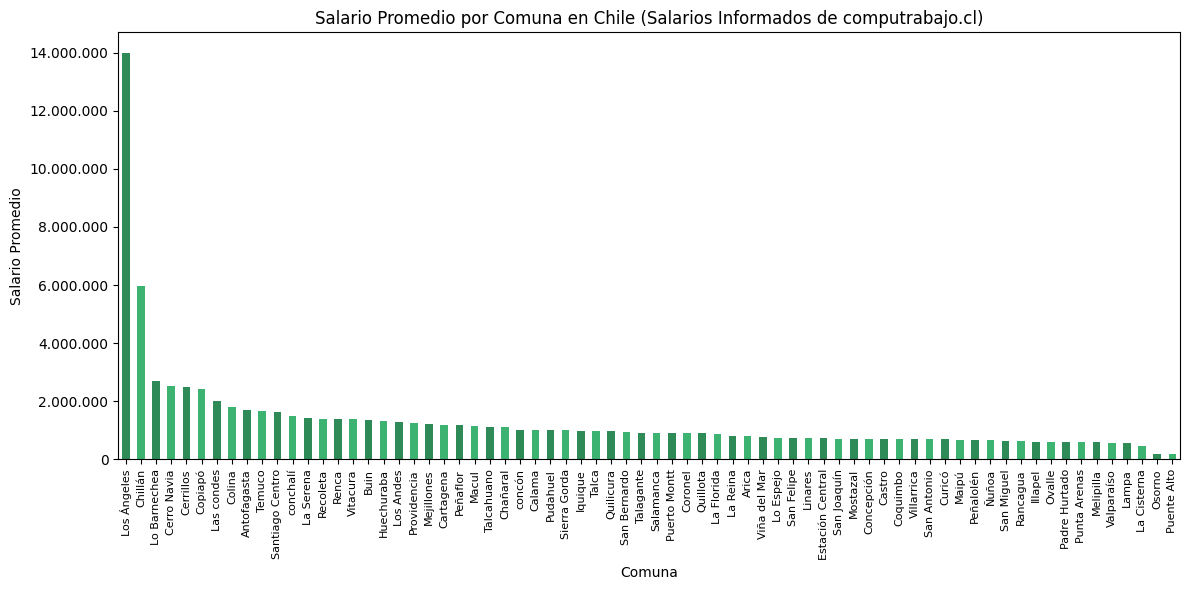

In [9]:
# Limpiar datos: eliminar filas con salarios o comunas vacías
df2 = df2.dropna(subset=["Salario", "Comuna"])

# Convertir salario a número (por si viene como texto)
df2["Salario"] = pd.to_numeric(df2["Salario"], errors="coerce")
df2 = df2.dropna(subset=["Salario"])  # eliminar si quedó NaN después de convertir

# Agrupar por comuna y calcular salario promedio
salarios_promedio = df2.groupby("Comuna")["Salario"].mean()

# Ordenar de mayor a menor
salarios_promedio = salarios_promedio.sort_values(ascending=False)

# Función para formatear los números como enteros con separador de miles
formatter = FuncFormatter(lambda x, _: f'{int(x):,}'.replace(",", "."))

# Alternar colores
colors = ['seagreen' if i % 2 == 0 else 'mediumseagreen' for i in range(len(salarios_promedio))]

# Graficar
pltgr.figure(figsize=(12, 6))
salarios_promedio.plot(kind="bar", color=colors)
pltgr.title("Salario Promedio por Comuna en Chile (Salarios Informados de computrabajo.cl)")
pltgr.xlabel("Comuna")
pltgr.ylabel("Salario Promedio")
pltgr.xticks(rotation=90, fontsize=8)
pltgr.gca().yaxis.set_major_formatter(formatter)
pltgr.tight_layout()
pltgr.show()

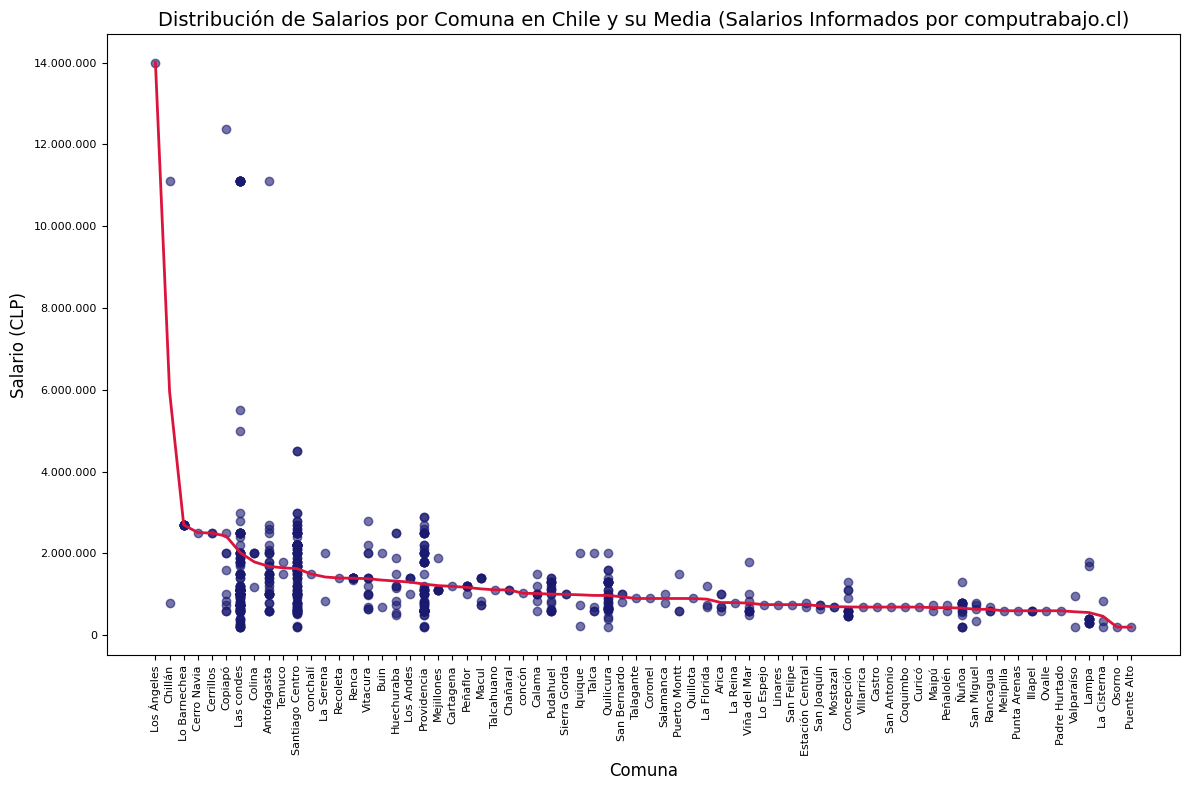

In [ ]:
# Limpiar datos
df2 = df2.dropna(subset=["Salario", "Comuna"])
df2["salario"] = pd.to_numeric(df2["Salario"], errors="coerce")
df2 = df2.dropna(subset=["Salario"])

# Agrupar por comuna y calcular salario promedio
salarios_promedio = df2.groupby("Comuna")["Salario"].mean()

# Ordenar las comunas por salario promedio de mayor a menorvvvvvvvvvvvvvvvvvvvvvv
comunas_ordenadas = salarios_promedio.sort_values(ascending=False).index

# Función para formatear los números como enteros con separador de miles
formatter = FuncFormatter(lambda x, _: f'{int(x):,}'.replace(",", "."))

# Graficar
pltgr.figure(figsize=(12, 8))

# Crear scatter plot para todos los salarios, agrupados por comuna
for comuna in comunas_ordenadas:
    salarios_comuna = df2[df2["Comuna"] == comuna]["Salario"]
    pltgr.scatter([comuna] * len(salarios_comuna), salarios_comuna, alpha=0.6, label=comuna, color='midnightblue')

# Dibujar la línea continua de la media por comuna
# Usamos plt.plot para conectar las medias de cada comuna con una línea continua
pltgr.plot(comunas_ordenadas, salarios_promedio[comunas_ordenadas], color='crimson', linestyle='-', linewidth=2, label="Media por Comuna")

# Personalización del gráfico
pltgr.title("Distribución de Salarios por Comuna en Chile y su Media (Salarios Informados por computrabajo.cl)", fontsize=14)
pltgr.xlabel("Comuna", fontsize=12)
pltgr.ylabel("Salario (CLP)", fontsize=12)
pltgr.xticks(rotation=90, fontsize=8)
pltgr.yticks(fontsize=8)
pltgr.gca().yaxis.set_major_formatter(formatter)

# Ajuste de tamaño para evitar superposición de etiquetas
pltgr.tight_layout()
pltgr.show()

C:\Users\Francisco\AppData\Local\Temp\ipykernel_21220\1117003584.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salarios_promedio = df2.groupby("Región")["Salario"].mean()


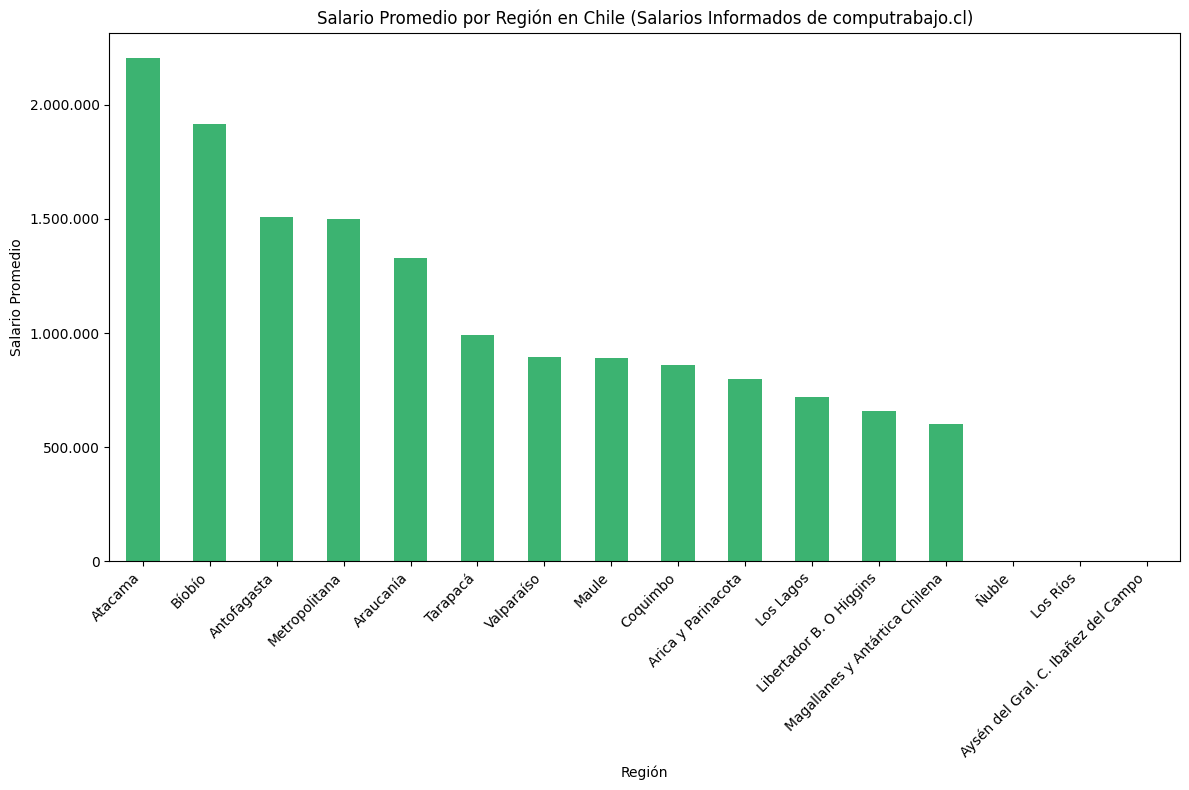

In [11]:
# Limpiar datos: eliminar filas con salarios o regiones vacías
df2 = df2.dropna(subset=["Salario", "Región"])

# Convertir salario a número (por si viene como texto)
df2["Salario"] = pd.to_numeric(df2["Salario"], errors="coerce")
df2 = df2.dropna(subset=["Salario"])  # eliminar si quedó NaN después de convertir

# Agrupar por región y calcular salario promedio
salarios_promedio = df2.groupby("Región")["Salario"].mean()

# Ordenar de mayor a menor
salarios_promedio = salarios_promedio.sort_values(ascending=False)

# Función para formatear los números como enteros con separador de miles
formatter = FuncFormatter(lambda x, _: f'{int(x):,}'.replace(",", "."))

# Graficar
pltgr.figure(figsize=(12, 8))
salarios_promedio.plot(kind="bar", color='mediumseagreen')
pltgr.title("Salario Promedio por Región en Chile (Salarios Informados de computrabajo.cl)")
pltgr.xlabel("Región")
pltgr.ylabel("Salario Promedio")
pltgr.xticks(rotation=45, ha='right')
pltgr.gca().yaxis.set_major_formatter(formatter)
pltgr.tight_layout()
pltgr.show()

In [12]:
# Filtrar ofertas con salarios en cada dataframe
ofertas_con_salario_ct = df[df['Salario'].notnull()]
ofertas_con_salario_comput = df2[df2['Salario'].notnull()]
ofertas_con_salario_indeed = df3[df3['salario'].notnull()]

import re
def es_salario_valido(salario):
    if isinstance(salario, str):
        return bool(re.match(r'^\d+(\.\d+)?$', salario))
    return False


# Eliminar puntos en los valores de la columna 'Salario' si los detecta
ofertas_con_salario_ct['Salario'] = ofertas_con_salario_ct['Salario'].str.replace('.', '', regex=False)


## Chiletrabajos df
ofertas_con_salario_ct = ofertas_con_salario_ct[ofertas_con_salario_ct['Salario'].apply(es_salario_valido)]


## indeed csv 
ofertas_con_salario_indeed['salario'] = ofertas_con_salario_indeed['salario'].str.replace("por mes", "", regex=False).str.replace("$", "", regex=False).str.replace(".","").str.strip()
# Eliminar salarios que tienen solo números iguales

# Separar en dos filas si hay un "-"
ofertas_con_salario_indeed = ofertas_con_salario_indeed.assign(salario=ofertas_con_salario_indeed['salario'].str.split('-')).explode('salario')
ofertas_con_salario_indeed['salario'] = ofertas_con_salario_indeed['salario'].str.strip()

# Filtrar las filas que contienen "por hora" en la columna salario
ofertas_con_salario_indeed = ofertas_con_salario_indeed[~ofertas_con_salario_indeed['salario'].str.contains("por hora", na=False)]
ofertas_con_salario_indeed['salario'] = ofertas_con_salario_indeed['salario'].str.replace(".","")

## Computrabajo df2
# Eliminar el .0 de los valores de salario en df2
ofertas_con_salario_comput['Salario'] = ofertas_con_salario_comput['Salario'].astype(str).str.replace('.0', '', regex=False).str.strip()

# Limpiar las comunas en cada dataframe de ofertas con salario
ofertas_con_salario_ct['Ubicacion'] = ofertas_con_salario_ct['Ubicacion'].apply(limpiaComunas)
ofertas_con_salario_comput['Comuna'] = ofertas_con_salario_comput['Comuna'].apply(limpiaComunas)
ofertas_con_salario_indeed['ubicacion'] = ofertas_con_salario_indeed['ubicacion'].apply(limpiaComunas)

# Convertir las columnas de salario a tipo numérico, manejando errores
ofertas_con_salario_ct['Salario'] = pd.to_numeric(ofertas_con_salario_ct['Salario'], errors='coerce')
ofertas_con_salario_comput['Salario'] = pd.to_numeric(ofertas_con_salario_comput['Salario'], errors='coerce')
ofertas_con_salario_indeed['salario'] = pd.to_numeric(ofertas_con_salario_indeed['salario'], errors='coerce')

# Eliminar salarios que contengan números iguales o
ofertas_con_salario_ct = ofertas_con_salario_ct[~ofertas_con_salario_ct['Salario'].astype(str).str.match(r'^(\d)\1+$')]
ofertas_con_salario_ct = ofertas_con_salario_ct[ofertas_con_salario_ct['Salario'] >= 100000]

ofertas_con_salario_comput = ofertas_con_salario_comput[~ofertas_con_salario_comput['Salario'].astype(str).str.match(r'^(\d)\1+$')]
ofertas_con_salario_comput = ofertas_con_salario_comput[ofertas_con_salario_comput['Salario'] >= 1000000]

ofertas_con_salario_indeed = ofertas_con_salario_indeed[~ofertas_con_salario_indeed['salario'].astype(str).str.match(r'^(\d)\1+$')]
ofertas_con_salario_indeed = ofertas_con_salario_indeed[ofertas_con_salario_indeed['salario'] >= 1000000]

# Calcular el promedio de salarios por ciudad/comuna
promedio_salarios_ct = ofertas_con_salario_ct.groupby('Ubicacion')['Salario'].mean().reset_index()
promedio_salarios_ct.columns = ['Ciudad/Comuna', 'Promedio_Salario']

promedio_salarios_comput = ofertas_con_salario_comput.groupby('Comuna')['Salario'].mean().reset_index()
promedio_salarios_comput.columns = ['Ciudad/Comuna', 'Promedio_Salario']

promedio_salarios_indeed = ofertas_con_salario_indeed.groupby('ubicacion')['salario'].mean().reset_index()
promedio_salarios_indeed.columns = ['Ciudad/Comuna', 'Promedio_Salario']

# Concatenar los promedios de salarios de los tres dataframes
promedio_salarios_total = pd.concat([promedio_salarios_ct, promedio_salarios_comput, promedio_salarios_indeed], ignore_index=True)

# Agrupar por ciudad/comuna y calcular el promedio final
promedio_salarios_total = promedio_salarios_total.groupby('Ciudad/Comuna', as_index=False).mean()

# Mostrar el resultado
print("Promedio de salarios por ciudad/comuna\n")
print(promedio_salarios_total.to_string(index=False))
# Filtrar los valores de salarios de Valparaíso



Promedio de salarios por ciudad/comuna

  Ciudad/Comuna  Promedio_Salario
    antofagasta      1.499828e+06
          arica      8.500000e+05
           buin      1.999999e+06
         calama      1.140000e+06
      cartagena      1.196307e+06
      cerrillos      2.500000e+06
    cerro navia      2.510000e+06
       chañaral      1.111108e+06
        chillán      1.111111e+07
         colina      1.046250e+06
     concepción      1.015278e+06
       conchalí      1.500000e+06
         concón      1.027000e+06
        copiapó      2.238787e+06
     huechuraba      1.403571e+06
        iquique      2.000000e+06
     la florida      1.200000e+06
      la serena      1.350000e+06
          lampa      1.750000e+06
     las condes      1.479134e+06
   lo barnechea      2.700000e+06
      los andes      1.300000e+06
    los ángeles      1.400000e+07
          macul      1.400000e+06
     mejillones      1.214286e+06
       peñaflor      1.171429e+06
    providencia      1.896142e+06
       p

C:\Users\Francisco\AppData\Local\Temp\ipykernel_21220\771532322.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_con_salario_ct['Salario'] = ofertas_con_salario_ct['Salario'].str.replace('.', '', regex=False)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_21220\771532322.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_con_salario_indeed['salario'] = ofertas_con_salario_indeed['salario'].str.replace("por mes", "", regex=False).str.replace("$", "", regex=False).str.replace(".","").st

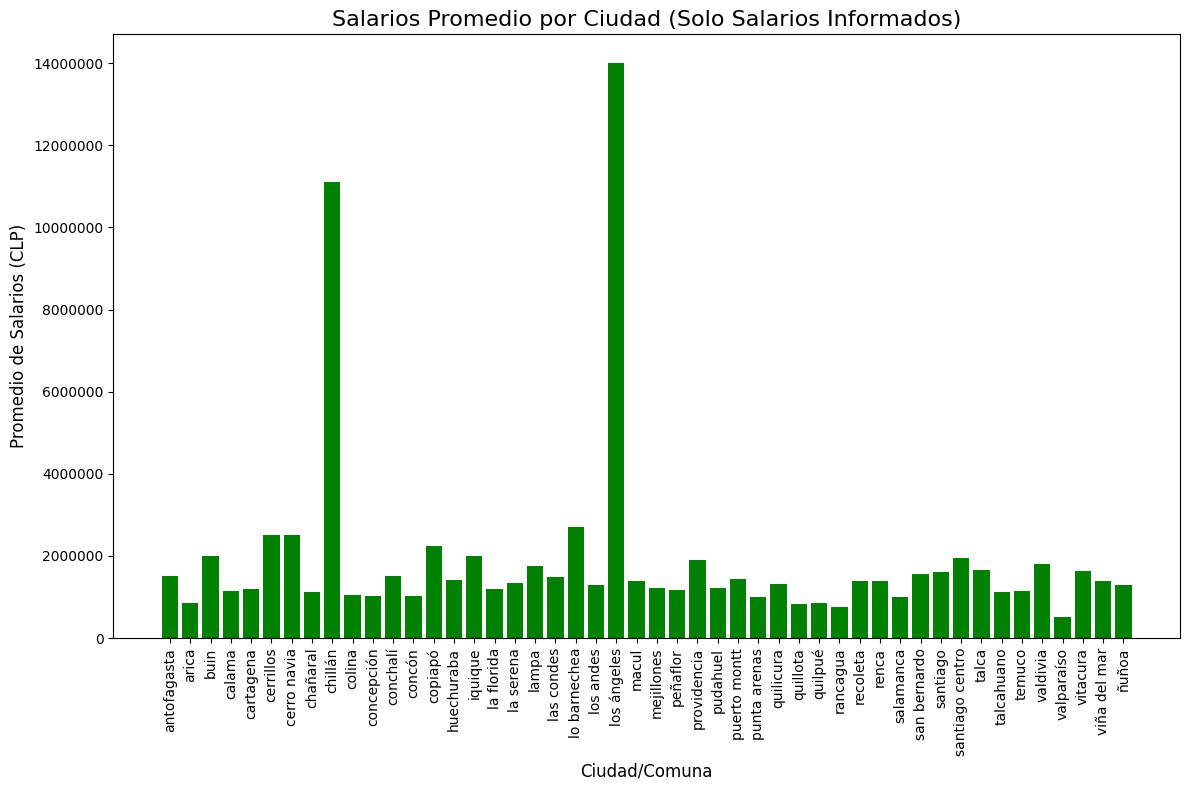

In [13]:
# Gráfico de salarios promedio por ciudad
pltgr.figure(figsize=(12, 8))
pltgr.bar(promedio_salarios_total['Ciudad/Comuna'], promedio_salarios_total['Promedio_Salario'], color='green')

# Configuración del gráfico
pltgr.title('Salarios Promedio por Ciudad (Solo Salarios Informados)', fontsize=16)
pltgr.xlabel('Ciudad/Comuna', fontsize=12)
pltgr.ylabel('Promedio de Salarios (CLP)', fontsize=12)
pltgr.xticks(rotation=90, fontsize=10)

# Evitar notación científica en el eje Y
pltgr.ticklabel_format(style='plain', axis='y')

pltgr.tight_layout()

# Mostrar el gráfico
pltgr.show()

In [14]:
def clasificar_puesto(oferta):
    oferta = str(oferta).lower().replace('\"','').strip()
    categorias = {
            "Fullstack": ['angular net core','web master','fullstack', 'full stack', 'full-stack'],
            "Frontend": ['frontend', 'front end', 'front-end'],
            "Backend": ['hosting','oracle','backend', 'back end', 'back-end', 'sql'],
            "Data Scientist": ['data','data scientist', 'big data', 'bigdata', 'datos', 'data engineer', 'ingeniero de datos', 'analytics engineer'],
            "Lider de proyecto": ['jefe de aplicaciones','pmo','ingeniero de proyectos','jefe/a de proyectos','jefe de ti','business owner','product manager','lider de proyectos','ágil coach','lider ti','ingeniero proyecto','management lead','product owner','jefa/e de proyectos','agile coach','ingeniero de proyectos/procesos','jefe de desarrollo','jefe de informática','líder', 'scrum master', 'jefe de proyecto','jefe proyecto', 'project manager', 'tech lead','technical lead'],
            "Cloud": ['cloud', 'aws', 'azure', 'gcp'],
            "DevOps": ['devops'],
            "Ciberseguridad": ['forensic','auditor','fraud manager','security','ciberseguridad', 'seguridad', 'ethical hacking', 'ethical hacker', 'penetration tester'],
            "UX/UI": ['product designer','ux', 'ui', 'ux/ui', 'diseñador ux', 'diseñadora ux'],
            "Mobile": ['mobile', 'movil', 'android', 'ios', 'react native'],
            "QA": ['qa', 'tester', 'testeo','quality assurance', 'aseguramiento de calidad', 'control de calidad','quality'],
            "Analista": ['analista','analyst'],
            "Developer": ['ingeniero de aplicaciones','development','.net','desasrollador','programación','ingeniero en programación','desarrollo','progrmador','ingeniero desarrollo de software','developer', 'programador', 'desarrollador', 'ingeniero de software', 'software engineer', 'programador java', 'programador php'],
            "Soporte Técnico": ['it help','support','customer assistance','soporte', 'mantenimiento', 'mesa de ayuda', 'helpdesk'],
            "Técnico": ['técnico','tecnico', 'técnico informático', 'técnico en telecomunicaciones', 'técnico en computación'],
            "Práctica Profesional": ['práctica','practica', 'alumno en práctica'],
            "Arquitecto de Software": ['arquitecto de software', 'arquitecta de software'],
            "Consultor": ['consultant','account manager','consultor', 'consultora', 'consulting'],
            "Administrador": ['servidores','manager','encargado ti','encargado de sistema','jefe (a) plataforma','administrador', 'gestor'],
            "Redes": ['networking','networking engineer','redes', 'comunicaciones', 'telecomunicaciones'],
            "Business Intelligence": ['web analytics','business analyst','business analytics','business intelligence', 'bi'],
            "Especialista en Sistemas": ['dba','sap','platform engineer','sistemas', 'infraestructura'],
            "Ingeniero de IA": ['machine learning', 'inteligencia artificial', 'ia', 'ingeniero de ia']
        }
    

    for categoria, keywords in categorias.items():
        if any(kw in oferta for kw in keywords):
            return categoria
    
    with open("otros.txt", "a", encoding="utf-8") as f:
        f.write(f"{oferta}\n")

    return "Otros"

df['Puesto'] = df['Oferta'].apply(clasificar_puesto)
df2['Puesto'] = df2['Cargo'].apply(clasificar_puesto)
df3['Puesto'] = df3['oferta'].apply(clasificar_puesto)
tabla_puestos_indeed = df3['Puesto'].value_counts().reset_index()
tabla_puestos_comput = df2['Puesto'].value_counts().reset_index()
tabla_puestos = df['Puesto'].value_counts().reset_index()
tabla_puestos.columns = ['Puesto', 'Cantidad_Ofertas']
tabla_puestos_comput.columns = ['Puesto', 'Cantidad_Ofertas']
tabla_puestos_indeed.columns = ['Puesto', 'Cantidad_Ofertas']


C:\Users\Francisco\AppData\Local\Temp\ipykernel_21220\2561660170.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Puesto'] = df['Oferta'].apply(clasificar_puesto)


In [15]:
# data frames de ofertas con salario
# ofertas_con_salario_ct , ofertas_con_salario_comput, ofertas_con_salario_indeed
# Crear tablas de promedio de salarios por tipo de puesto
# Aplicar la función clasificar_puesto a las tablas de ofertas con salario
ofertas_con_salario_ct['Puesto'] = ofertas_con_salario_ct['Oferta'].apply(clasificar_puesto)
ofertas_con_salario_comput['Puesto'] = ofertas_con_salario_comput['Cargo'].apply(clasificar_puesto)
ofertas_con_salario_indeed['Puesto'] = ofertas_con_salario_indeed['oferta'].apply(clasificar_puesto)
promedio_salarios_ct_puesto = ofertas_con_salario_ct.groupby('Puesto')['Salario'].mean().reset_index()
promedio_salarios_ct_puesto.columns = ['Puesto', 'Promedio_Salario']

promedio_salarios_comput_puesto = ofertas_con_salario_comput.groupby('Puesto')['Salario'].mean().reset_index()
promedio_salarios_comput_puesto.columns = ['Puesto', 'Promedio_Salario']

promedio_salarios_indeed_puesto = ofertas_con_salario_indeed.groupby('Puesto')['salario'].mean().reset_index()
promedio_salarios_indeed_puesto.columns = ['Puesto', 'Promedio_Salario']

# Concatenar las tablas de promedio de salarios
promedio_salarios_puesto_total = pd.concat(
    [promedio_salarios_ct_puesto, promedio_salarios_comput_puesto, promedio_salarios_indeed_puesto],
    ignore_index=True
)

# Agrupar por tipo de puesto y calcular el promedio final
promedio_salarios_puesto_total = promedio_salarios_puesto_total.groupby('Puesto', as_index=False).mean()

# Mostrar la tabla resultante
print("Promedio de salarios por tipo de puesto\n")
print(promedio_salarios_puesto_total.to_string(index=False))

Promedio de salarios por tipo de puesto

                  Puesto  Promedio_Salario
           Administrador      1.585293e+06
                Analista      1.196922e+06
                 Backend      2.369444e+06
   Business Intelligence      1.788889e+06
          Ciberseguridad      1.300000e+06
                   Cloud      2.240870e+06
               Consultor      1.781250e+06
          Data Scientist      1.657143e+06
                  DevOps      2.950000e+06
               Developer      1.715570e+06
Especialista en Sistemas      2.189506e+06
                Frontend      2.085000e+06
               Fullstack      2.000980e+06
         Ingeniero de IA      1.721528e+06
       Lider de proyecto      1.868038e+06
                  Mobile      2.689722e+06
                   Otros      1.262375e+06
    Práctica Profesional      8.812495e+05
                      QA      1.900000e+06
                   Redes      1.625000e+06
         Soporte Técnico      1.123097e+06
             

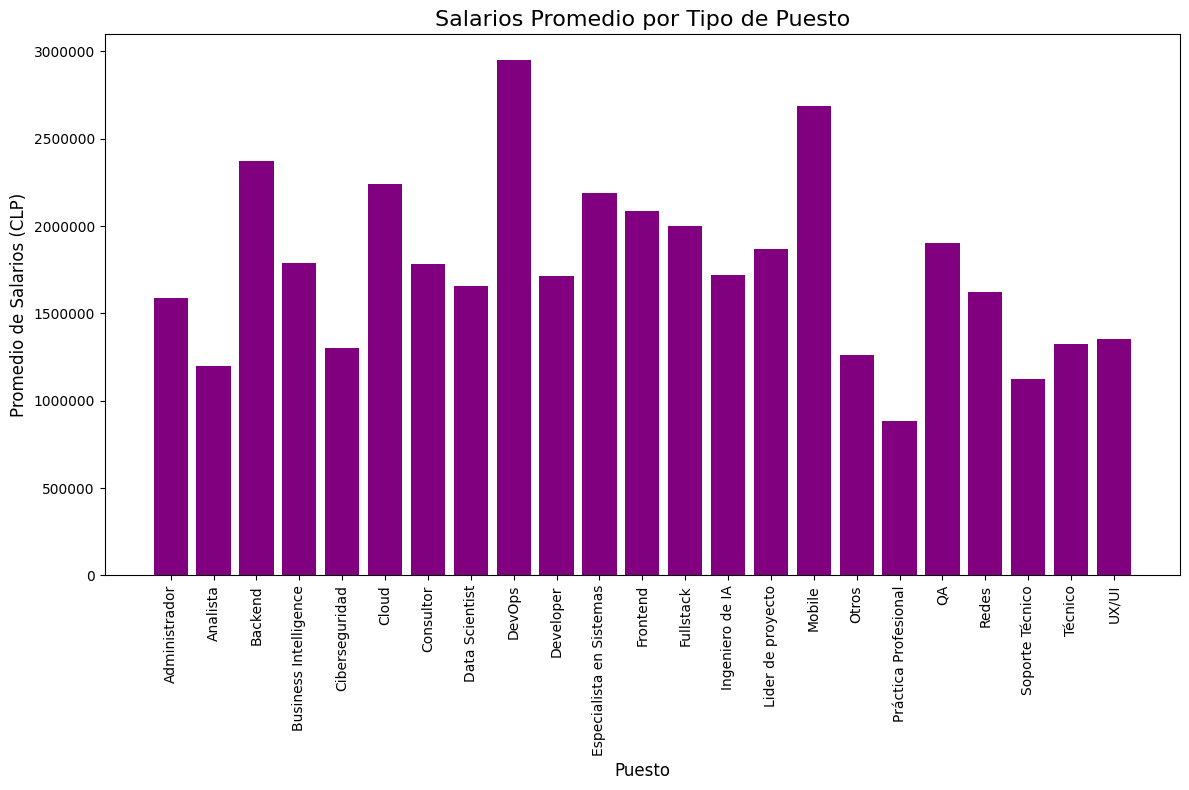

In [16]:
# Gráfico de salarios promedio por tipo de puesto
pltgr.figure(figsize=(12, 8))
pltgr.bar(promedio_salarios_puesto_total['Puesto'], promedio_salarios_puesto_total['Promedio_Salario'], color='purple')

# Configuración del gráfico
pltgr.title('Salarios Promedio por Tipo de Puesto', fontsize=16)
pltgr.xlabel('Puesto', fontsize=12)
pltgr.ylabel('Promedio de Salarios (CLP)', fontsize=12)
pltgr.xticks(rotation=90, fontsize=10)

# Evitar notación científica en el eje Y
pltgr.ticklabel_format(style='plain', axis='y')

pltgr.tight_layout()

# Mostrar el gráfico
pltgr.show()

In [17]:
# Concatenamos ambas tablas
tabla_total = pd.concat([tabla_puestos, tabla_puestos_comput,tabla_puestos_indeed])

# Agrupamos por 'Puesto' y sumamos las ofertas
tabla_total = tabla_total.groupby('Puesto', as_index=False).sum()

# Ordenamos de mayor a menor cantidad de ofertas
tabla_total = tabla_total.sort_values(by='Cantidad_Ofertas', ascending=False)

# Mostramos la tabla final
print("Total de ofertas por puesto (sumando Chiletrabajos y Computrabajo)\n")
tabla_total = tabla_total.sort_values(by='Puesto', ascending=True)
print(tabla_total.to_string(index=False))

Total de ofertas por puesto (sumando Chiletrabajos y Computrabajo)

                  Puesto  Cantidad_Ofertas
           Administrador                77
                Analista               218
                 Backend                92
   Business Intelligence                19
          Ciberseguridad                20
                   Cloud                58
               Consultor                74
          Data Scientist               125
                  DevOps                16
               Developer               221
Especialista en Sistemas                29
                Frontend                43
               Fullstack               111
         Ingeniero de IA                77
       Lider de proyecto               151
                  Mobile                88
                   Otros               128
    Práctica Profesional                66
                      QA                52
                   Redes                37
         Soporte Técnico     

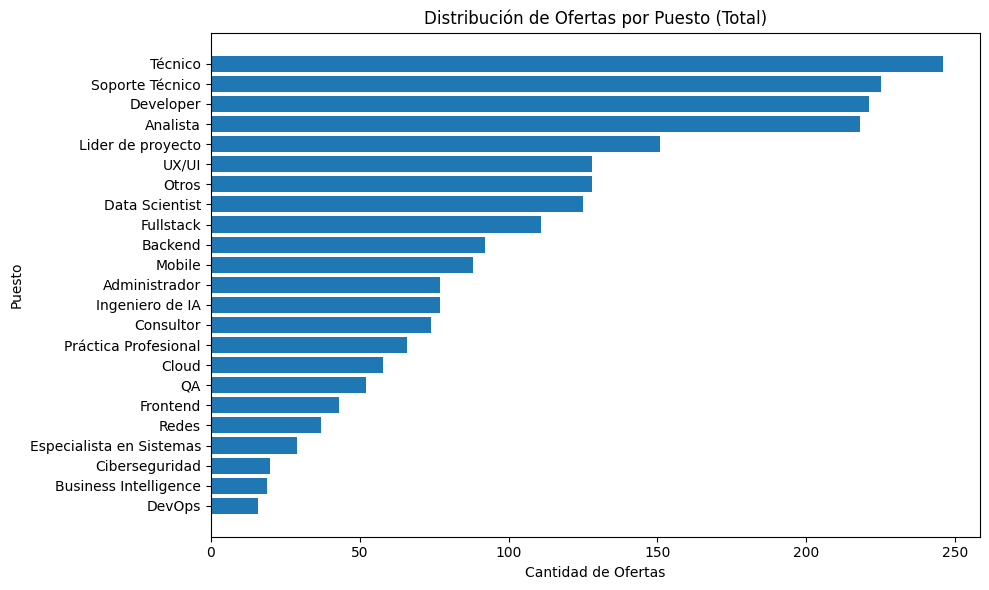

In [18]:
# Pie chart de puestos
tabla_total_sorted = tabla_total.sort_values(by='Cantidad_Ofertas', ascending=True)

pltgr.figure(figsize=(10, 6))
pltgr.barh(tabla_total_sorted['Puesto'], tabla_total_sorted['Cantidad_Ofertas'])
pltgr.xlabel('Cantidad de Ofertas')
pltgr.ylabel('Puesto')
pltgr.title('Distribución de Ofertas por Puesto (Total)')
pltgr.tight_layout()
pltgr.show()




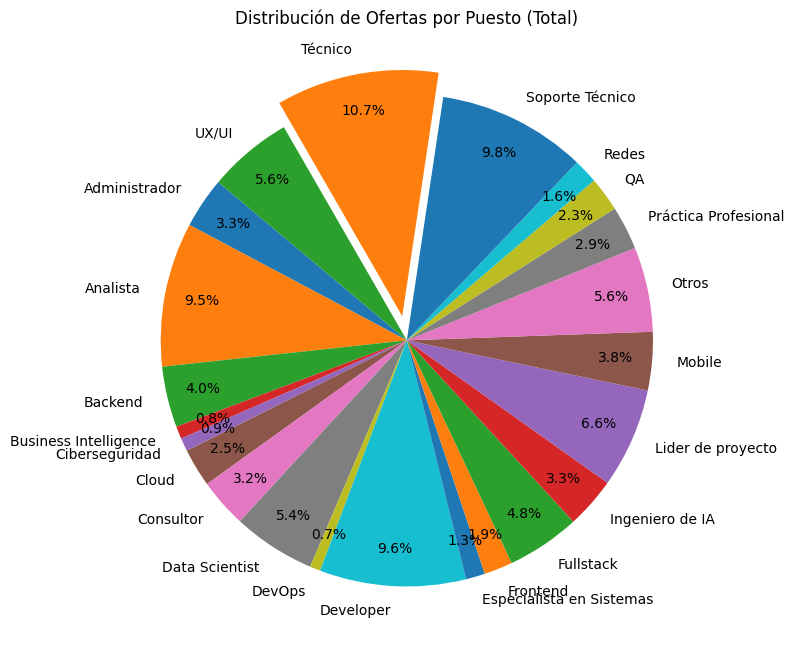

In [19]:

labels = tabla_total['Puesto']
sizes = tabla_total['Cantidad_Ofertas']

# Explode la categoría más grande (opcional)
explode = [0.1 if s == max(sizes) else 0 for s in sizes]

pltgr.figure(figsize=(8, 8))
pltgr.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    pctdistance=0.85,
    labeldistance=1.1
)
pltgr.title('Distribución de Ofertas por Puesto (Total)')
pltgr.tight_layout()
pltgr.show()

C:\Users\Francisco\AppData\Local\Temp\ipykernel_21220\3582277356.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tecnologias"]=df["Descripcion"].apply(clasificar_tecnologias)


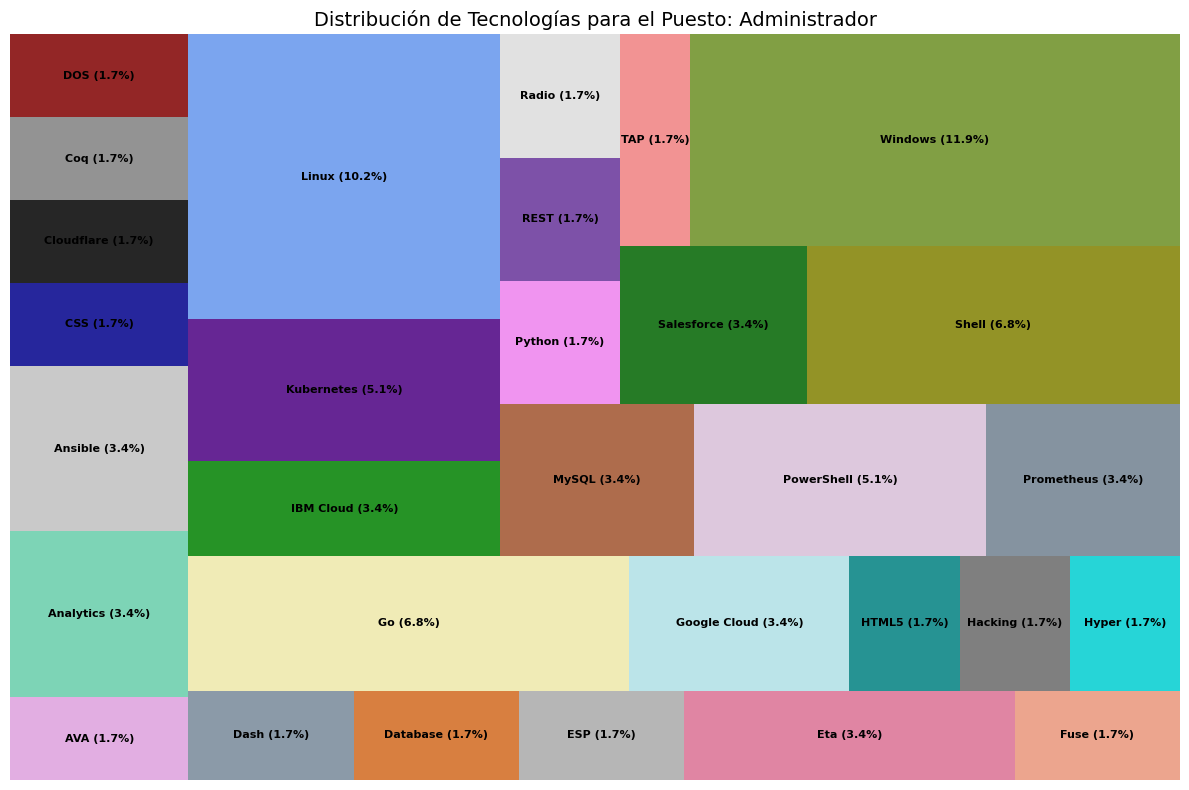

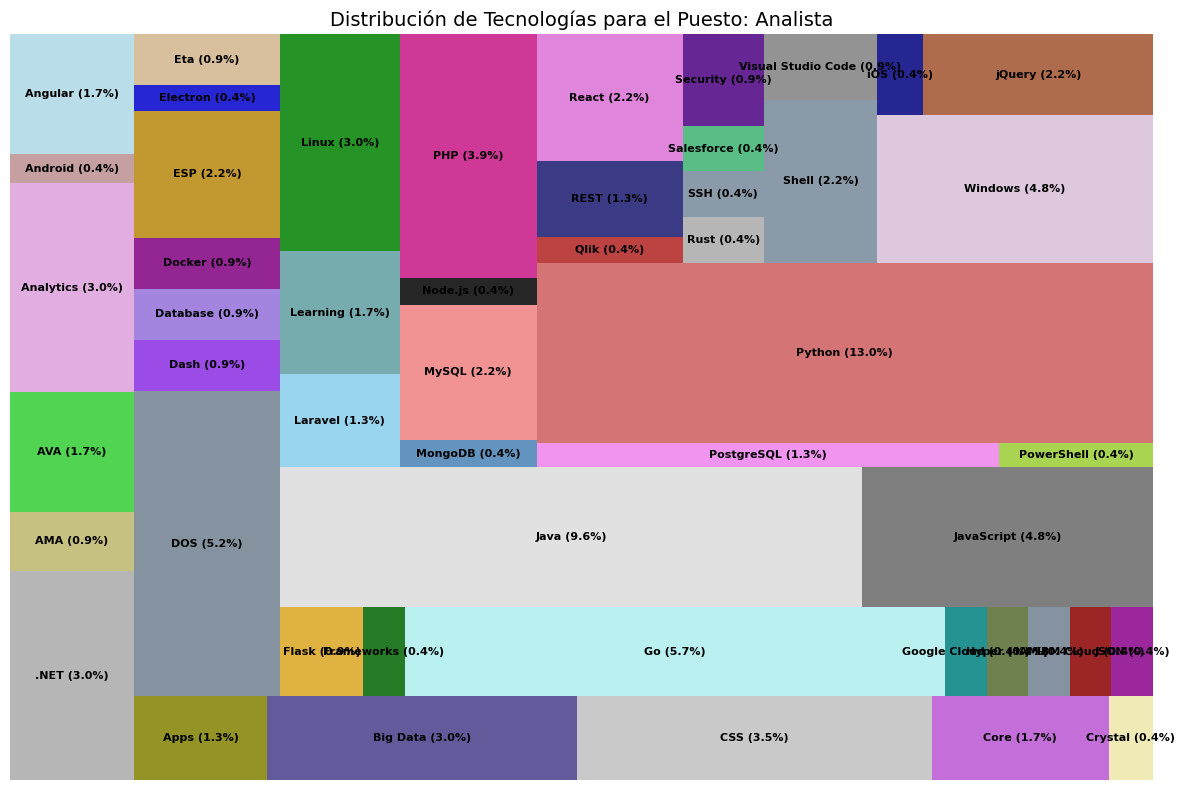

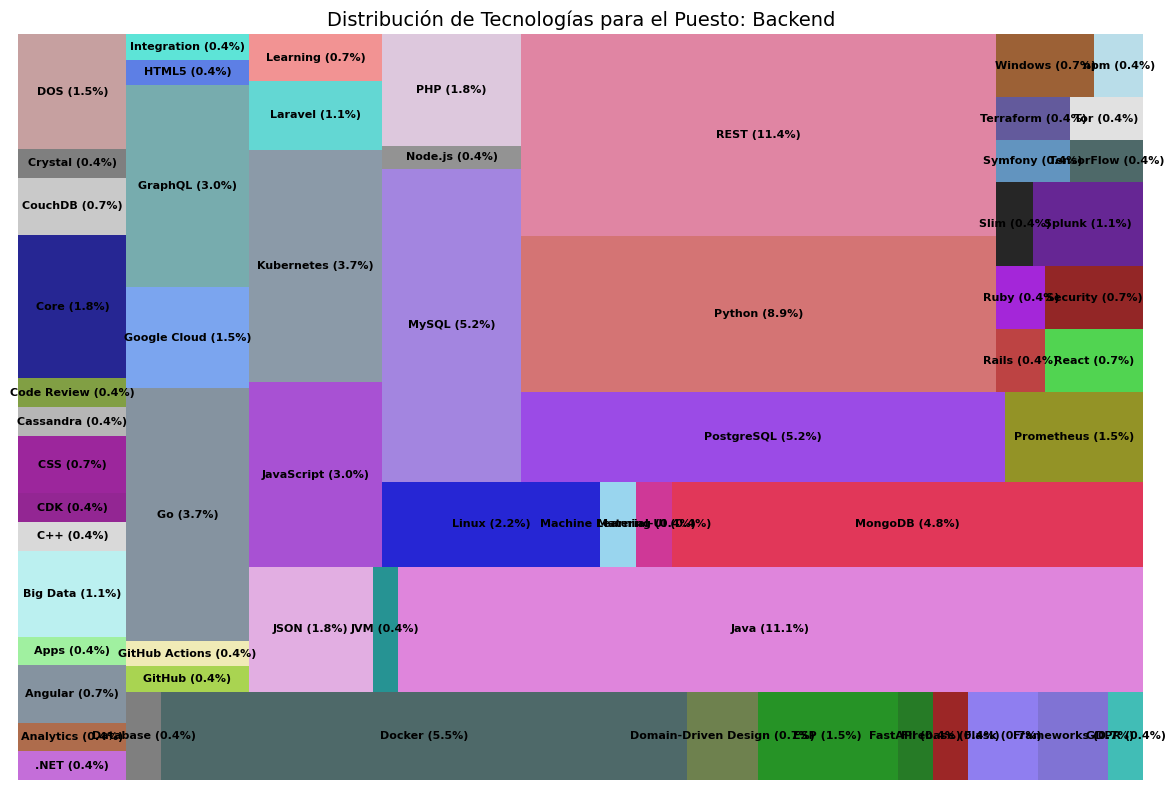

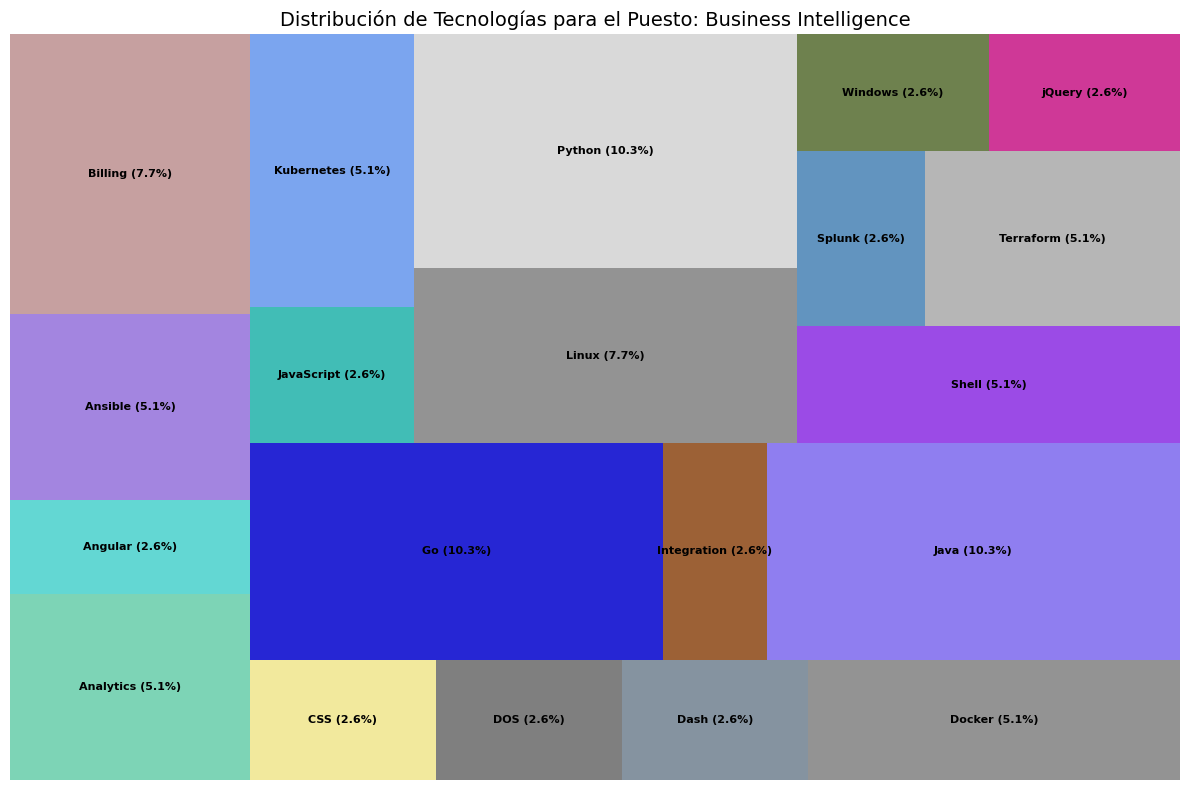

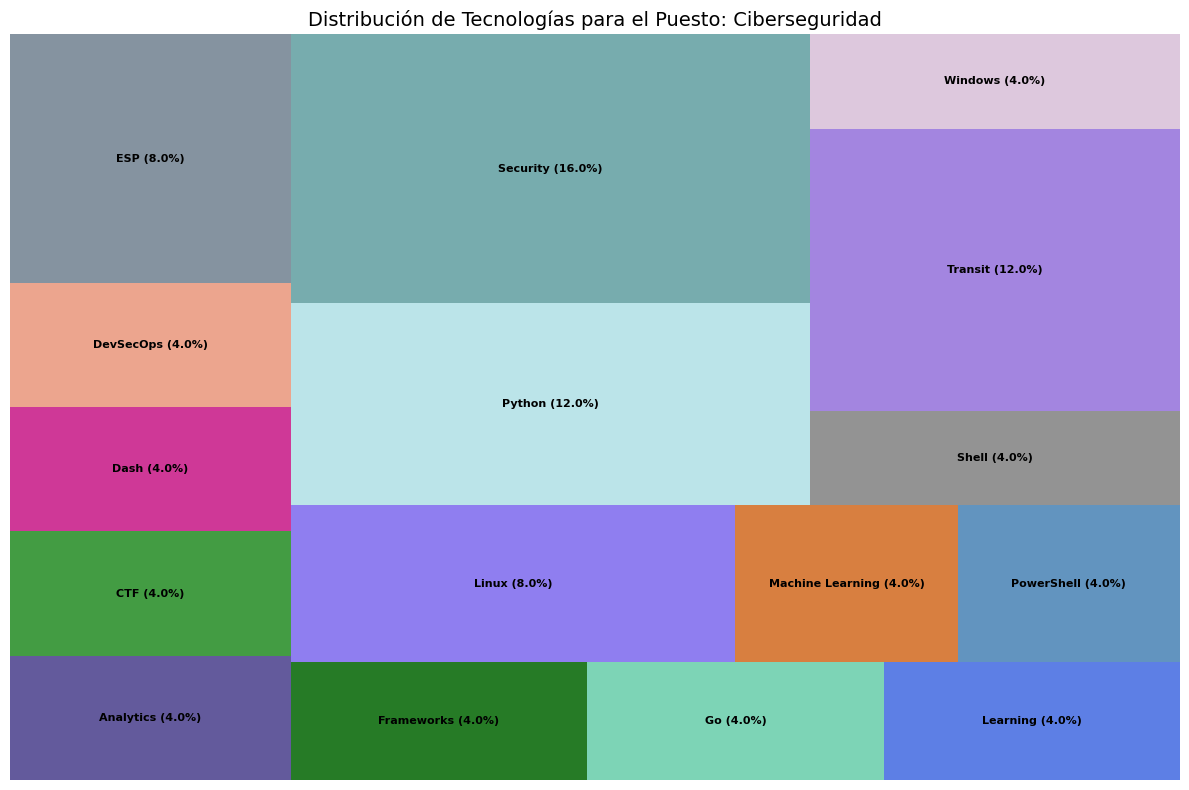

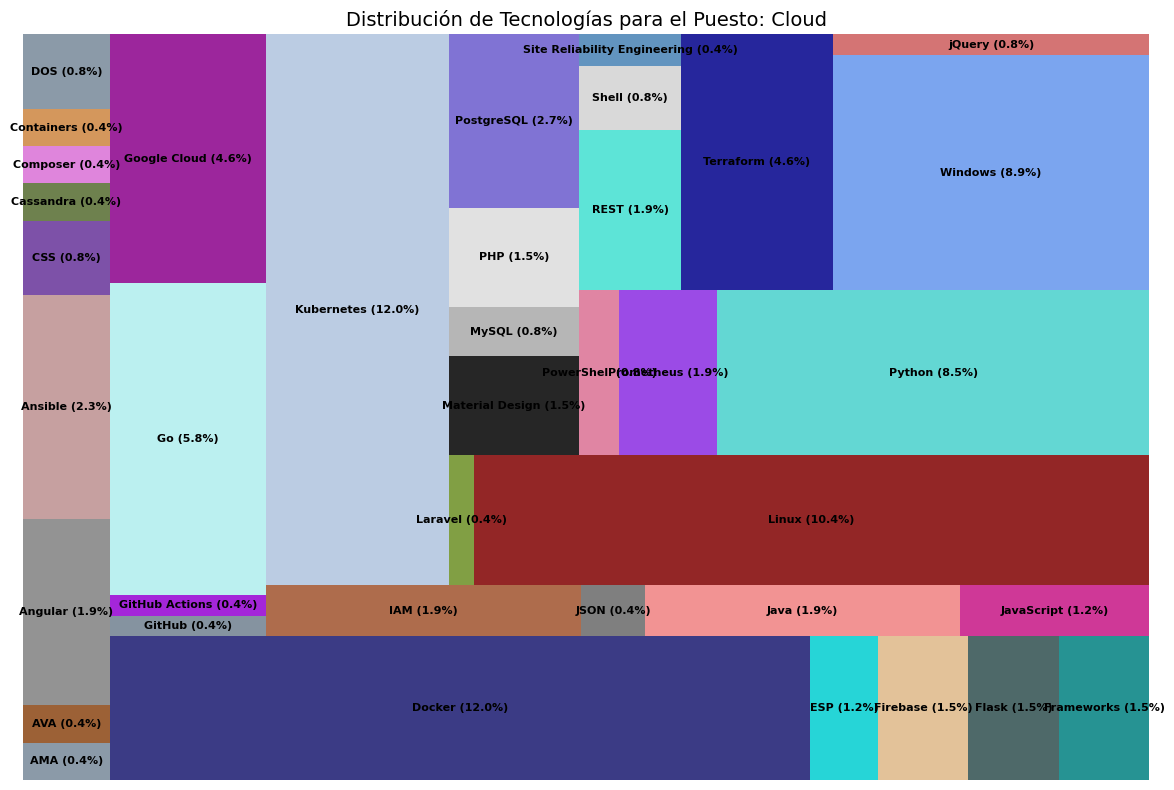

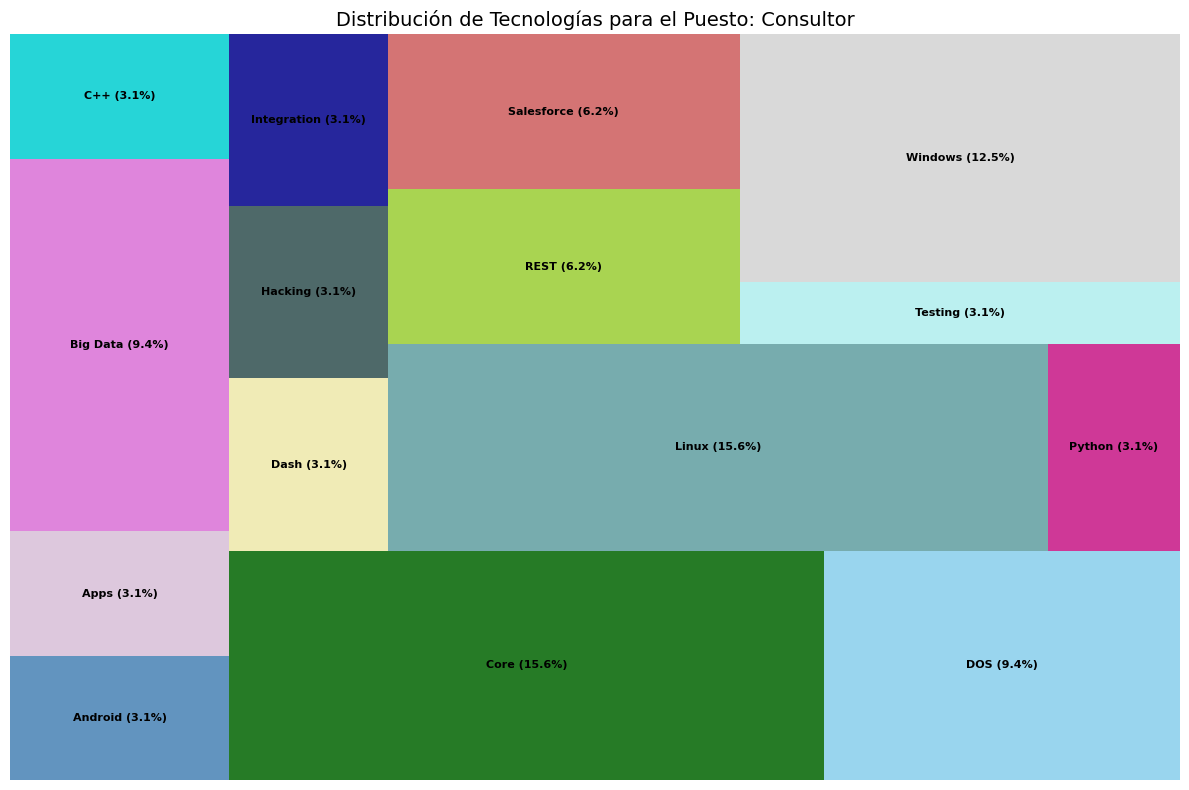

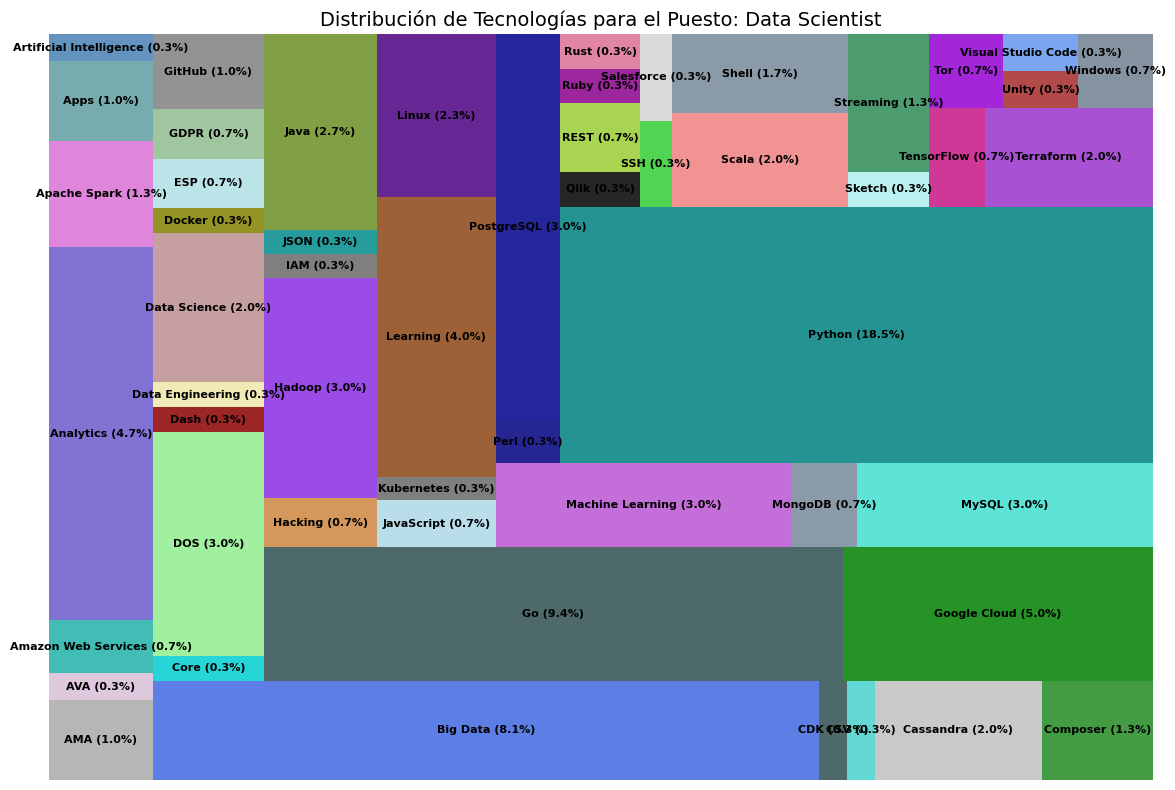

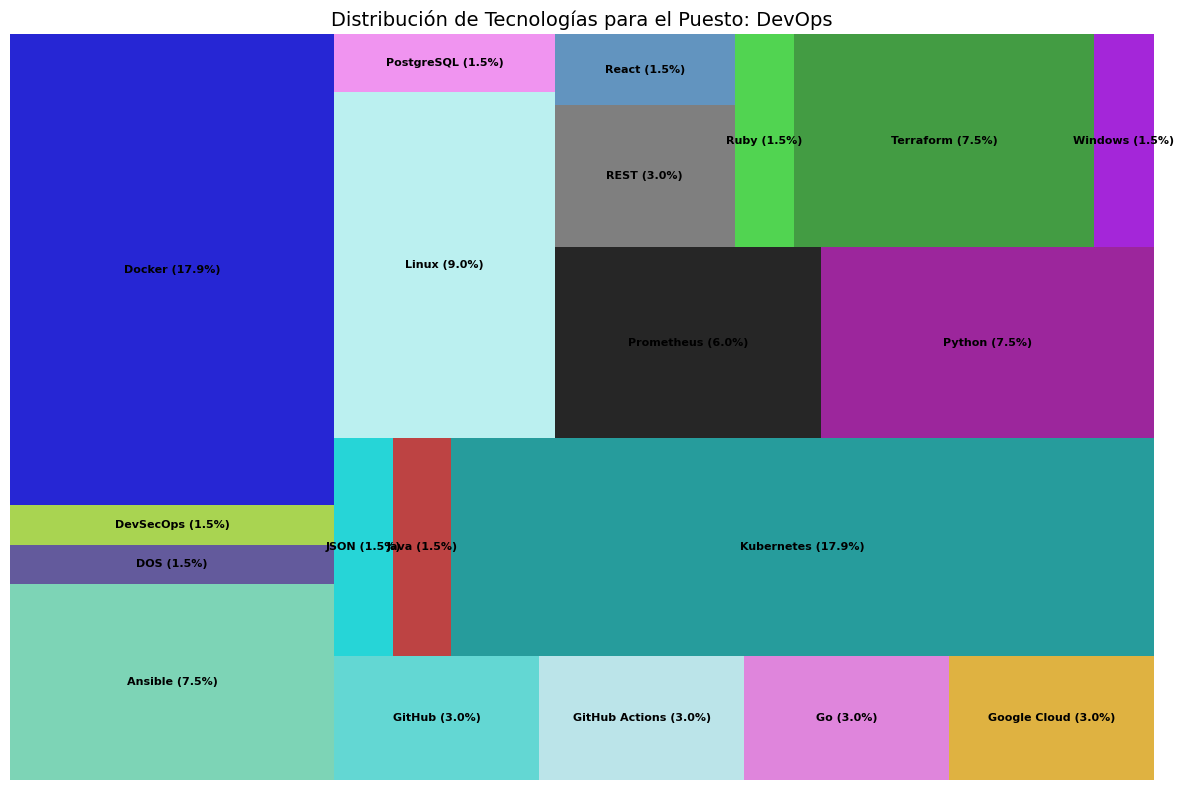

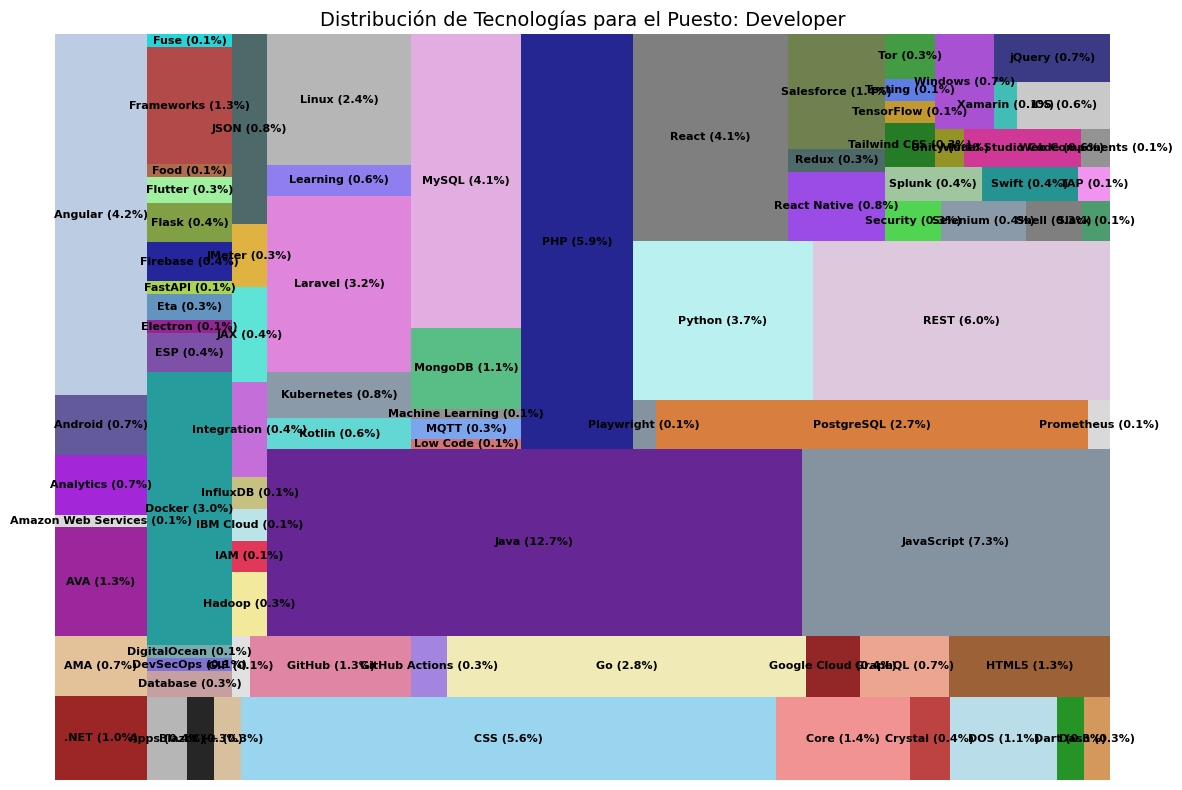

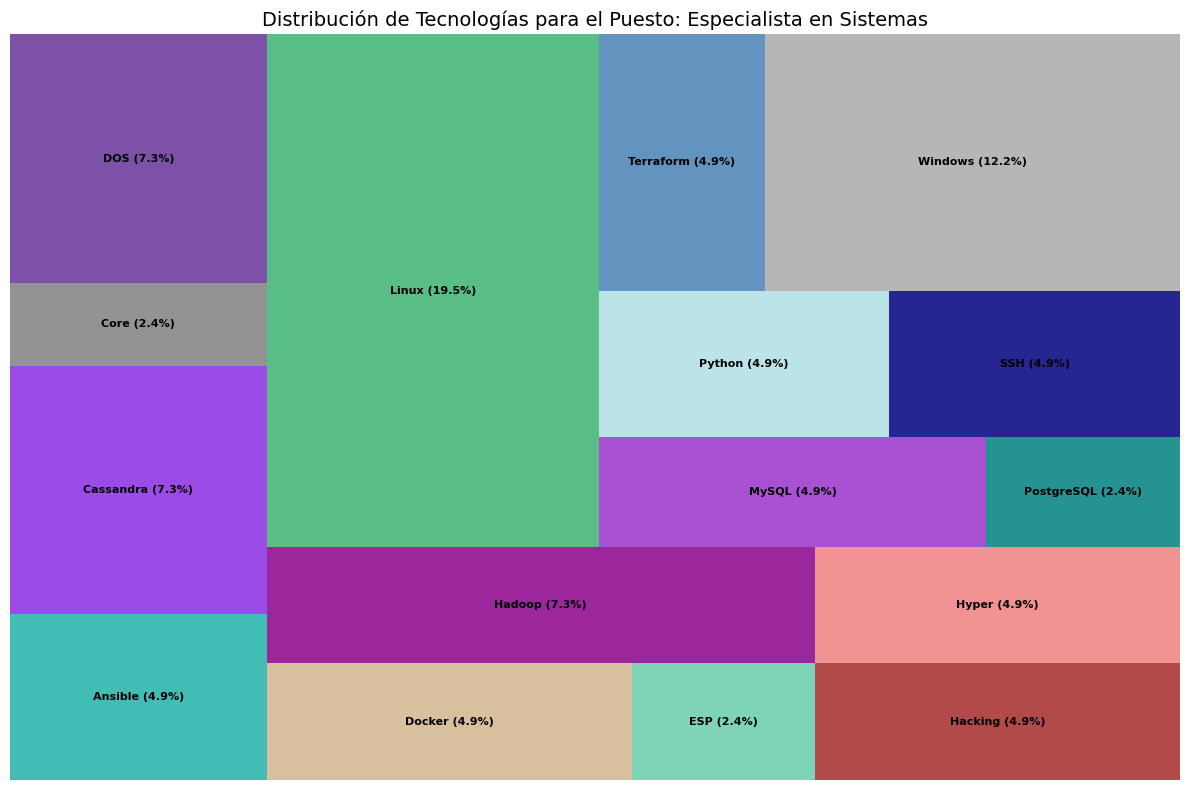

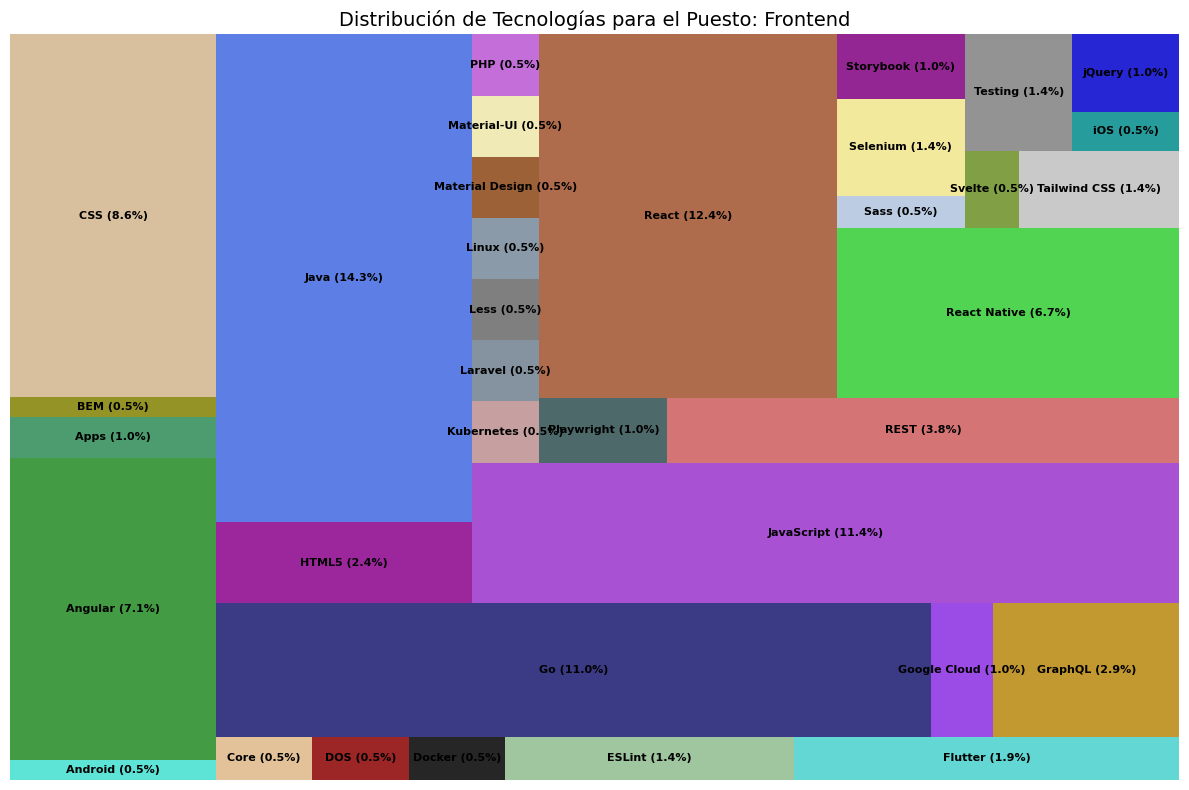

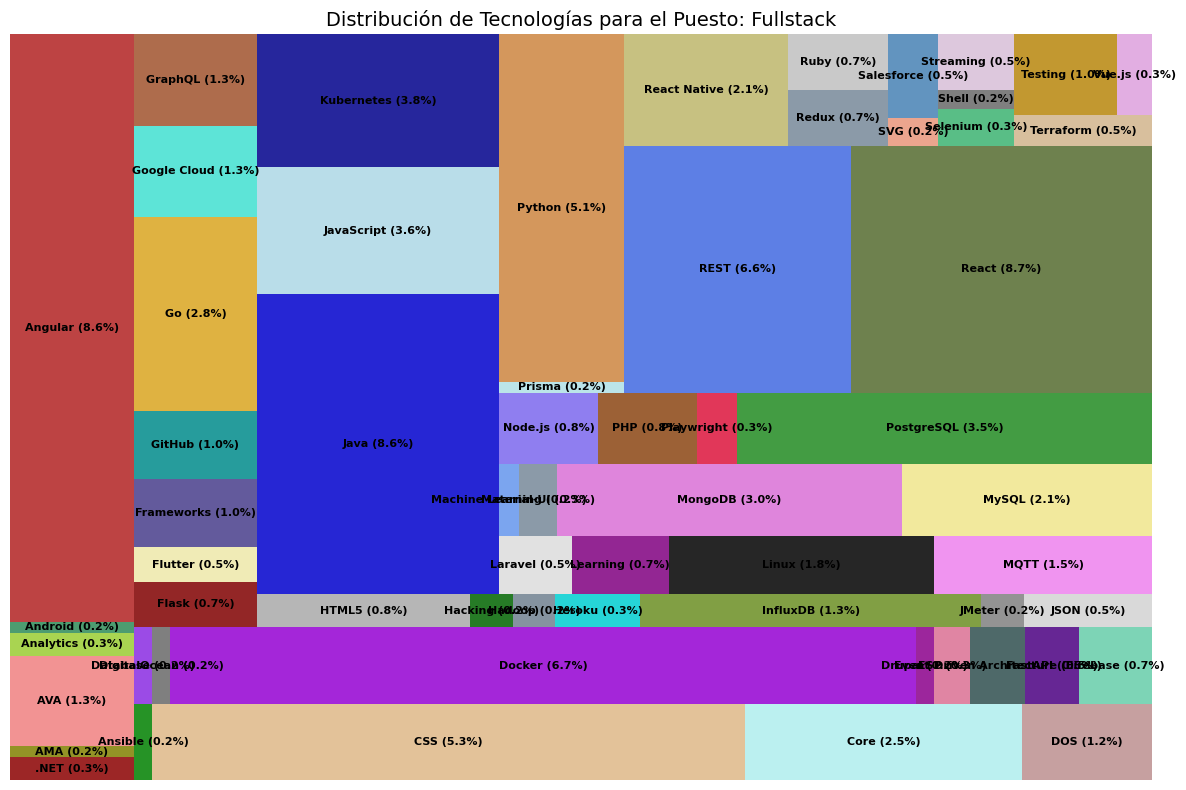

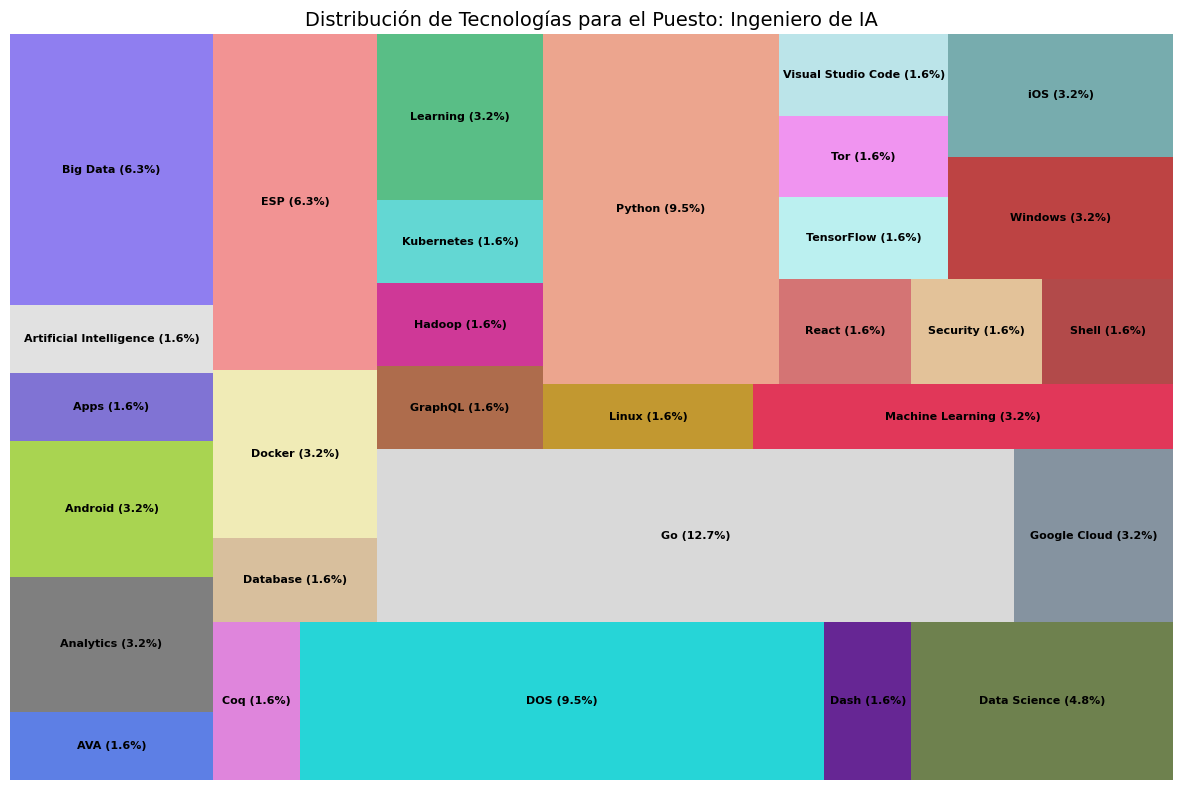

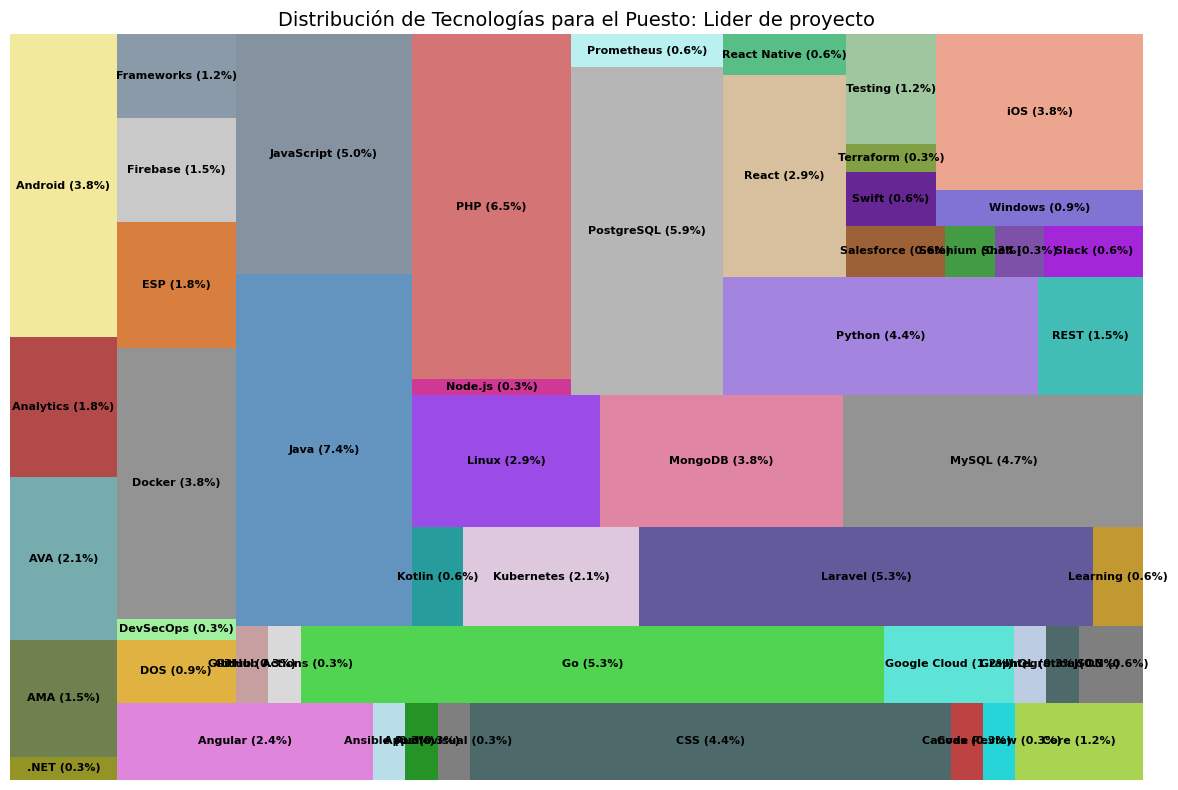

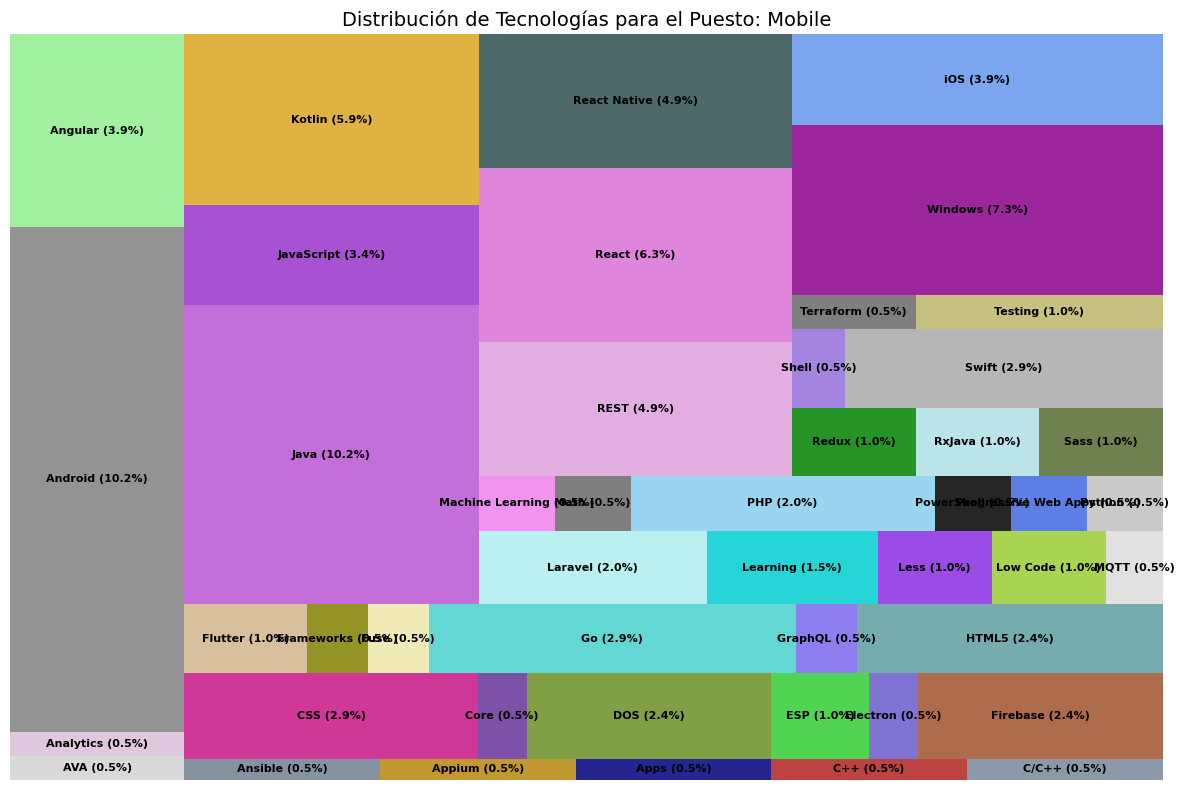

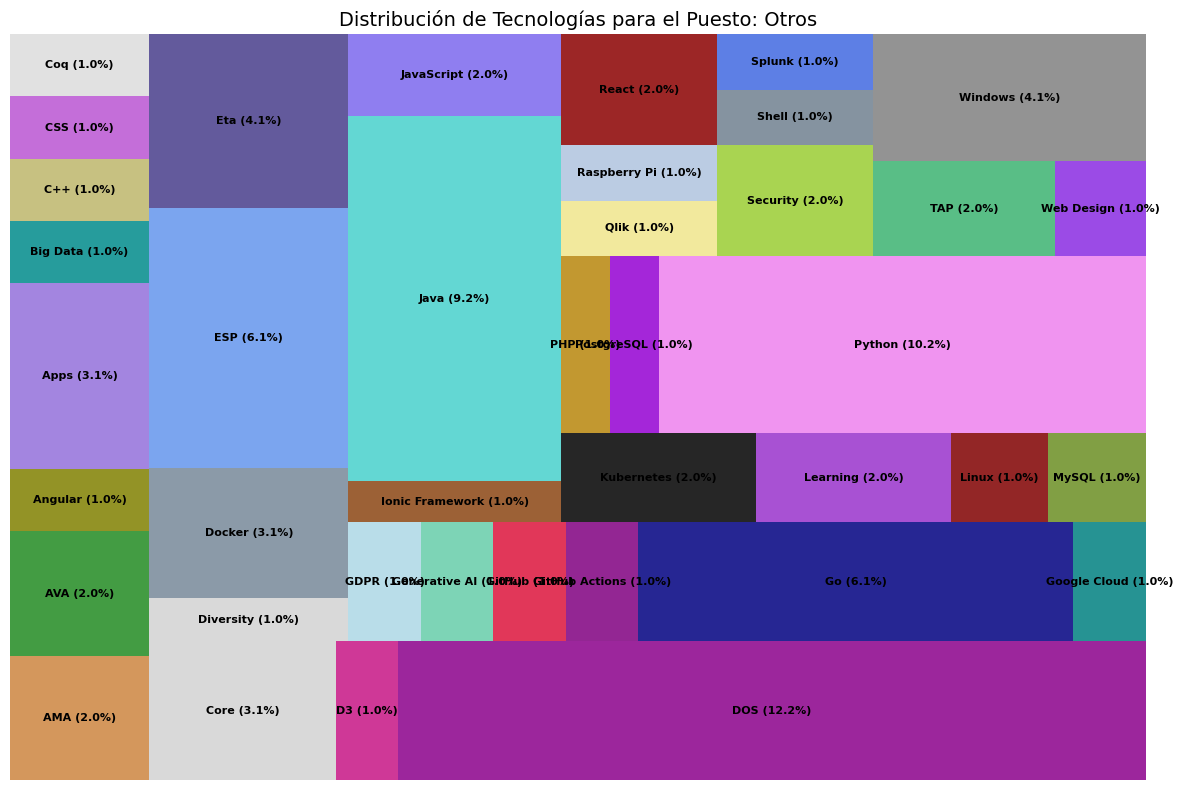

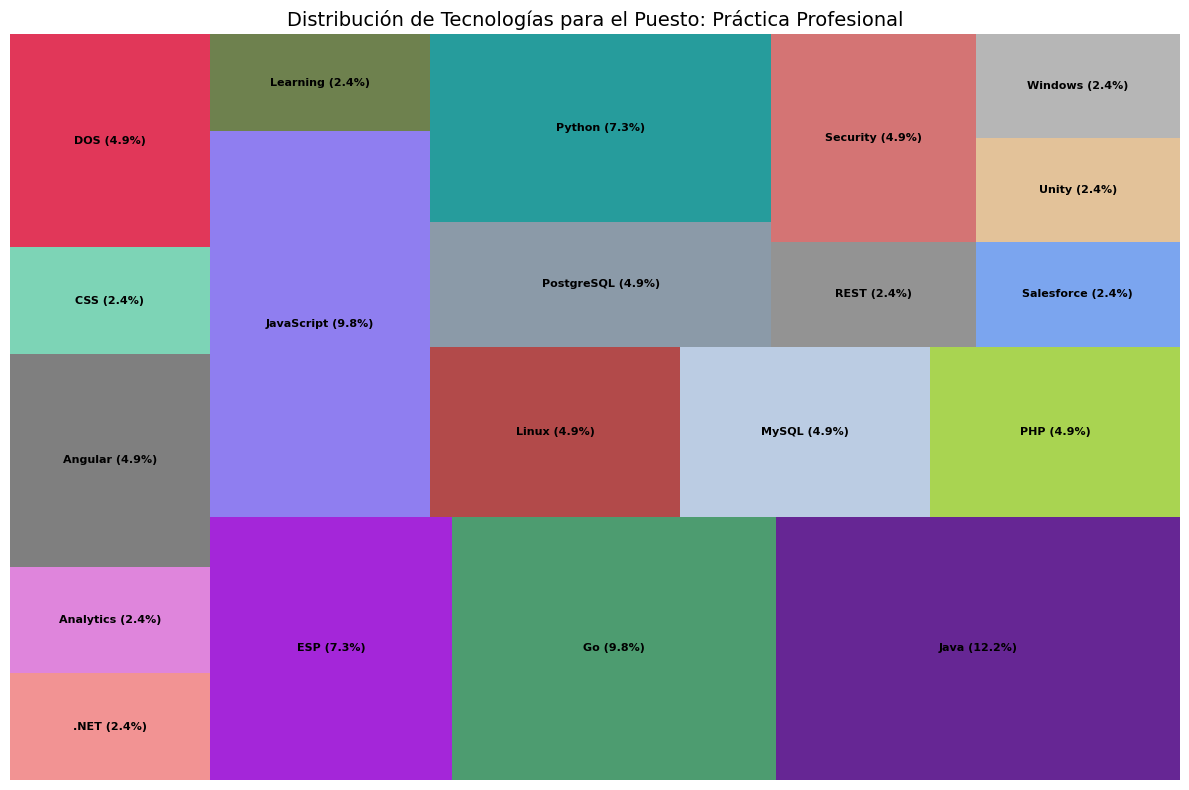

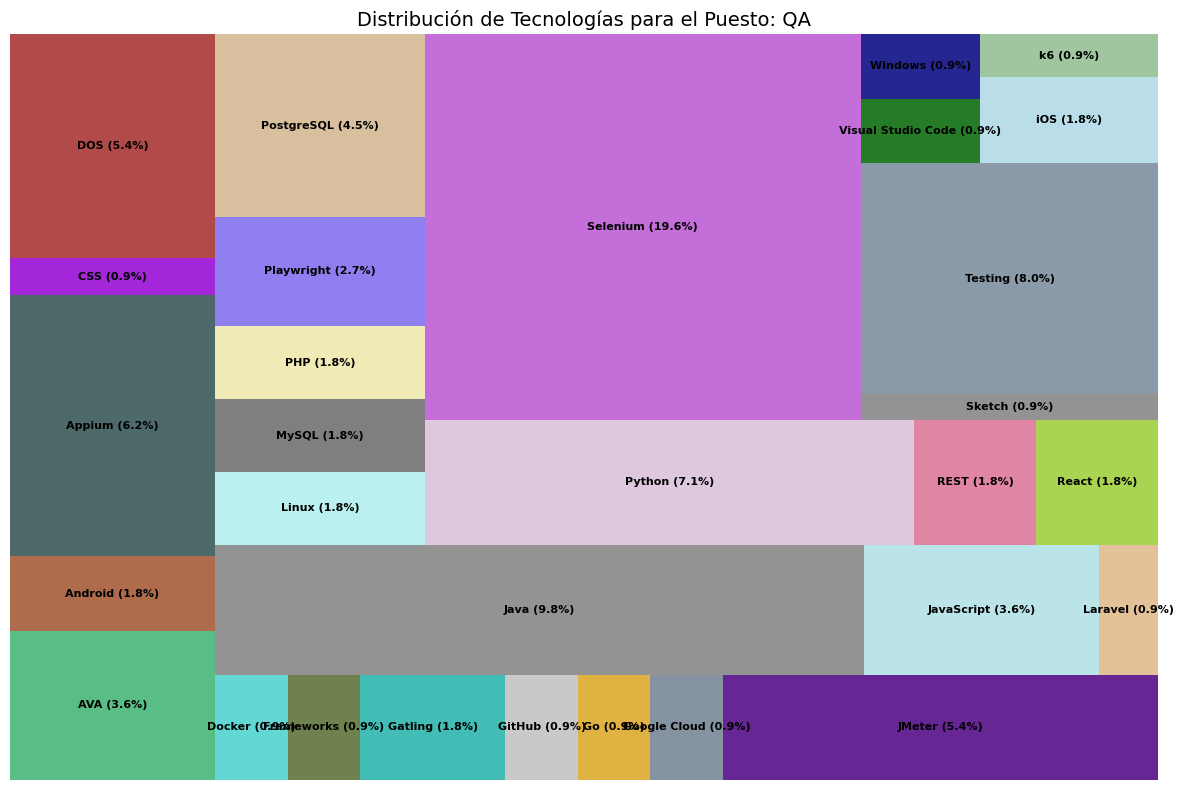

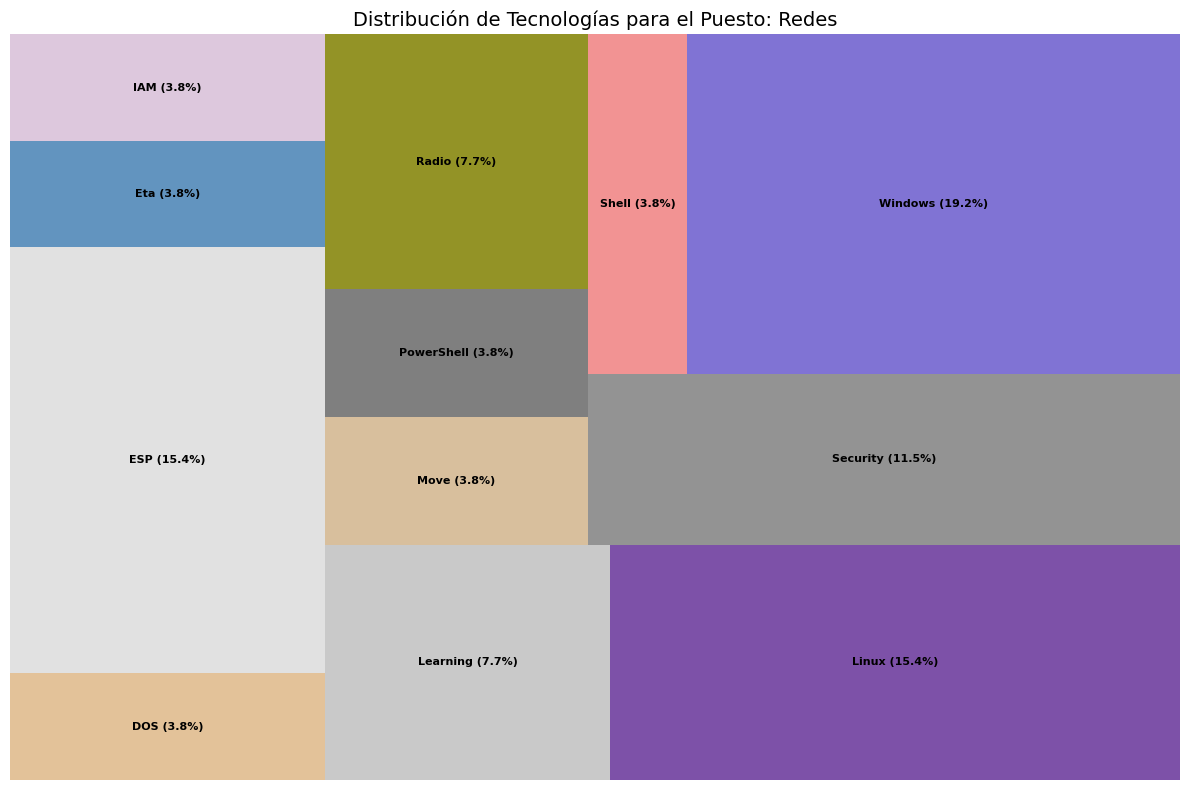

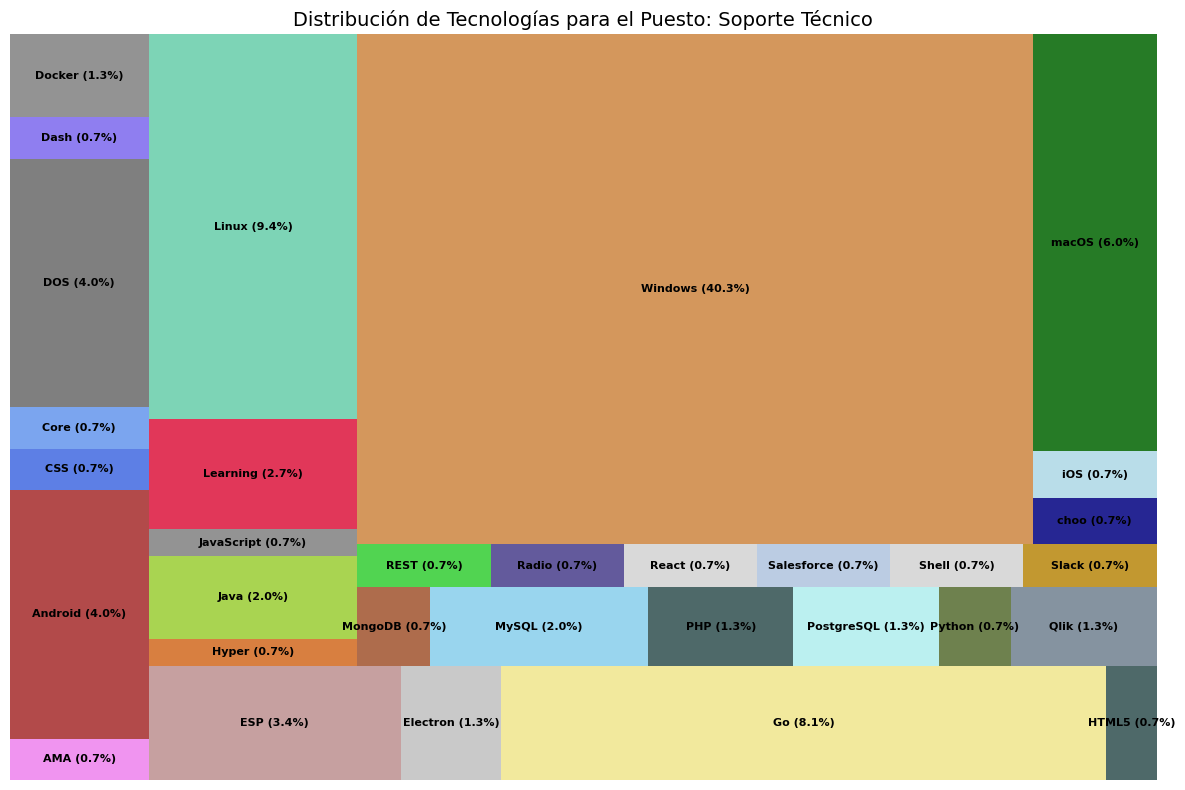

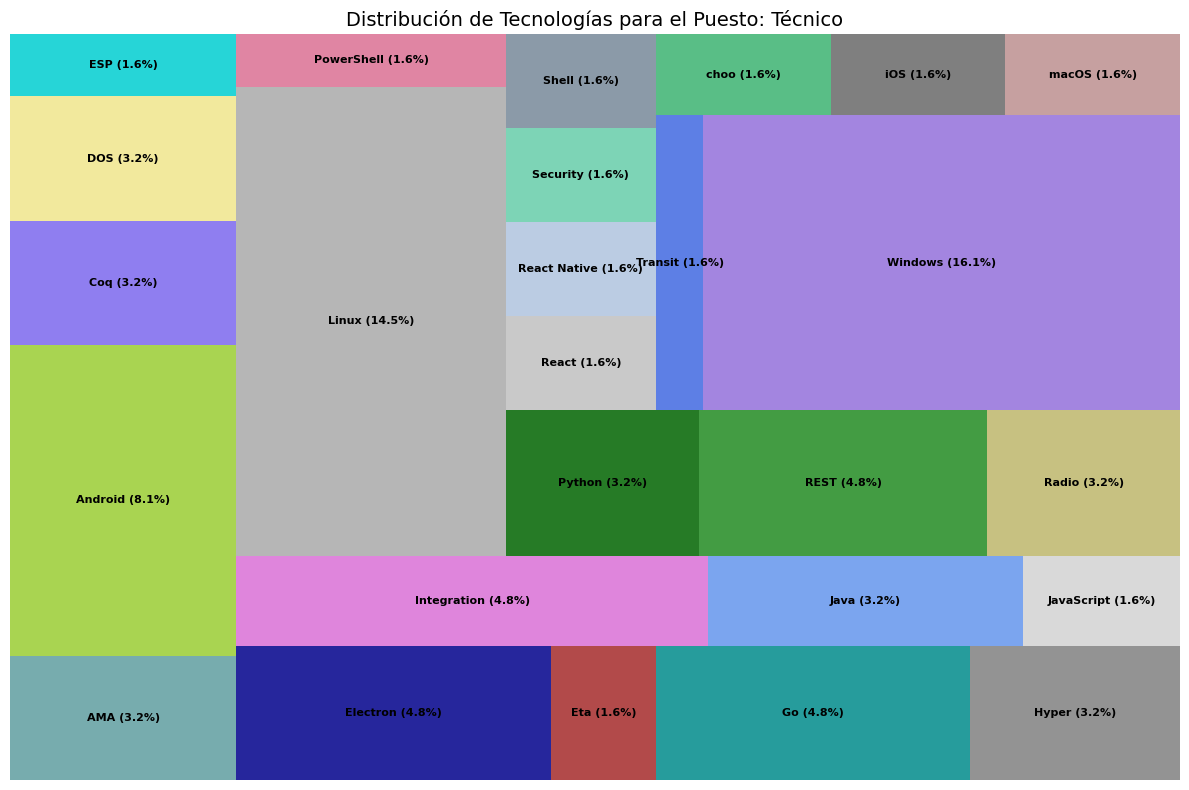

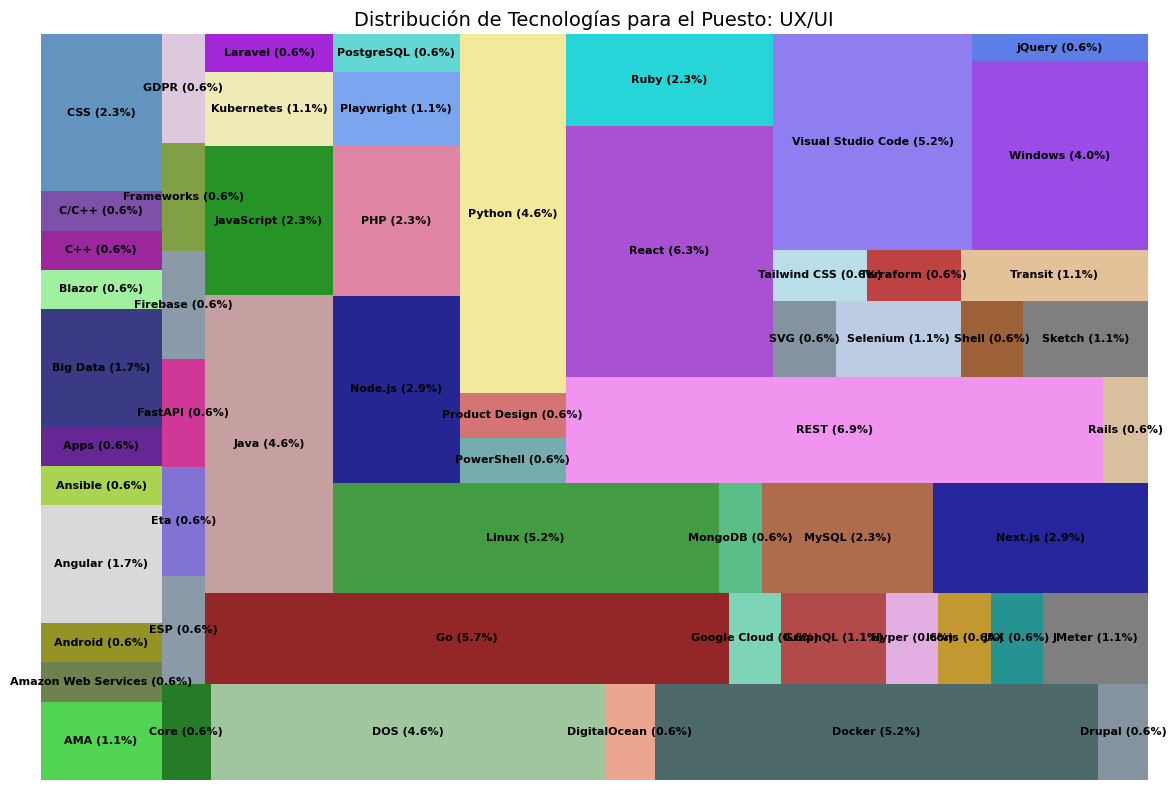

In [27]:
import re
import random
import matplotlib.colors as mcolors
import squarify


def extraer_items(cleaned_text):
    items = []
    # Separamos el texto por líneas
    for line in cleaned_text.splitlines():
        line = line.strip()
        # Consideramos sólo las líneas que inician con "- "
        if line.startswith('- '):
            # Quitamos el guión y el espacio inicial
            item = line[2:].strip()
            # Reemplazamos los enlaces Markdown [Texto](URL) por solo "Texto"
            item = re.sub(r'\[([^\]]+)\]\([^)]+\)', r'\1', item)
            # Si hay descripciones adicionales separadas por " - ", tomamos solo el primer segmento
            item = item.split(' - ')[0].strip()
            # Nos aseguramos de que sea una cadena de texto (plain text)
            items.append(str(item))
    return items

def clean_markdown(md_text):
    # 1. Elimina todas las etiquetas HTML
    cleaned = re.sub(r'<[^>]+>', '', md_text)
    return re.sub(r'## Contents.*?(?=\n## )', '', cleaned, flags=re.DOTALL)

def remove_contents_section(text):
    """
    Elimina la sección de "## Contents" junto con su contenido hasta el siguiente encabezado '##'.
    """
    # La bandera DOTALL permite que el . incluya saltos de línea
    return re.sub(r'## Contents.*?(?=\n## )', '', text, flags=re.DOTALL)

with open("tecs.md", "r", encoding="utf-8") as file:
    markdown_text = file.read()

def clasificar_tecnologias(texto):
    if not isinstance(texto, str):
        return texto
    tecs = []
    for tec in tecnologias:
        if tec in texto:
            if tec not in tecs:
                tecs.append(tec)
    return tecs



markdown_limpio = clean_markdown(markdown_text)

tecnologias = extraer_items(markdown_limpio)


df["Tecnologias"]=df["Descripcion"].apply(clasificar_tecnologias)
df2["Tecnologias"]=df2["Descripción"].apply(clasificar_tecnologias)
df3["Tecnologias"]=df3["descripcion"].apply(clasificar_tecnologias)




def generar_puestos_tecnologias(lista_df):
    puestos_tecnologias = []
    for df_temp in lista_df:
        # Verificar si el DataFrame tiene la columna "Puesto".
        if 'Puesto' not in df_temp.columns:
            continue
        for index, row in df_temp.iterrows():
            puesto = row['Puesto']
            tecnologias_asociadas = row['Tecnologias']
            # Aseguramos que sean listas (por si hay valores que no lo sean)
            if isinstance(tecnologias_asociadas, list):
                for tecnologia in tecnologias_asociadas:
                    puestos_tecnologias.append({'Puesto': puesto, 'Tecnologia': tecnologia})
    # Convertir la lista a un DataFrame
    tabla = pd.DataFrame(puestos_tecnologias)
    # Agrupar por "Puesto" y "Tecnologia" para contar las ocurrencias
    tabla_agrupada = tabla.groupby(['Puesto', 'Tecnologia']).size().reset_index(name='Cantidad')
    return tabla_agrupada

# Se combinan los tres DataFrames en una lista y se genera la tabla
tabla_puestos_tecnologias = generar_puestos_tecnologias([df, df2, df3])

# Crear un gráfico de torta para cada puesto con las tecnologías asociadas
puestos_unicos = tabla_puestos_tecnologias['Puesto'].unique()

for puesto in puestos_unicos:
    tecnologias_puesto = tabla_puestos_tecnologias[tabla_puestos_tecnologias['Puesto'] == puesto]
    labels = tecnologias_puesto['Tecnologia'].values
    sizes = tecnologias_puesto['Cantidad'].values

    n_labels = len(labels)

    # Generar colores sin tonos muy claros
    base_colors = list(mcolors.CSS4_COLORS.values())
    base_colors = [c for c in base_colors if mcolors.rgb_to_hsv(mcolors.to_rgb(c))[2] < 0.95]
    selected_colors = random.sample(base_colors, n_labels)
    random.shuffle(selected_colors)

    # Agregar porcentaje al label
    total = sum(sizes)
    labels_with_pct = [f"{label} ({size / total * 100:.1f}%)" for label, size in zip(labels, sizes)]

    # Crear el treemap
    pltgr.figure(figsize=(12, 8))
    squarify.plot(
        sizes=sizes,
        label=labels_with_pct,
        color=selected_colors,
        alpha=0.85,
        text_kwargs={'fontsize': 8,'fontweight': 'bold', 'color': 'black'},
    )

    pltgr.axis('off')  # Quitar ejes
    pltgr.title(f'Distribución de Tecnologías para el Puesto: {puesto}', fontsize=14)
    pltgr.tight_layout()
    pltgr.show()